# Data preprocessing

Here below is where data is being imported , a weather dataset from a CSV file (weatherdata--1111422(in).csv) using pd.read_csv() and printing the entire DataFrame using df.to_string(). This allows you to inspect all rows and columns of the dataset, which includes weather attributes such as date, location (longitude, latitude), elevation, temperatures, precipitation, wind, relative humidity, and solar radiation (which currently has missing values).

In [165]:
import pandas as pd
df = pd.read_csv('weatherdata_raw.csv')
#df


Dropping unnecessary columns

Dropping unnecessary columns from the DataFrame.
The columns 'Longitude', 'Latitude', and 'Elevation' are removed because they are not required for the current analysis or modeling.This helps reduce memory usage and keeps only relevant data.

In [166]:
df = df.drop(columns=['Longitude','Latitude', 'Elevation'])

Checking for null values

Checking for null values – Ensures the dataset has no missing data that could cause errors or bias in analysis.

 Checking for null (missing) values in each column.
 df.isnull() creates a DataFrame of True/False for missing values.
.sum() counts the number of True values (nulls) for each column

In [167]:
# Printing the number of null values per column

In [168]:
nulls_per_column = df.isnull().sum()
print("Nulls per column:\n", nulls_per_column)

Nulls per column:
 Date                 0
Max Temperature      0
Min Temperature      0
Precipitation        0
Wind                 0
Relative Humidity    0
Solar                0
dtype: int64


Checking for duplicates 

Checking for duplicates – Ensures all records are unique to prevent skewing results in analysis or training a model.

In [169]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


Displaying Dataframe structure and column information

 Displaying DataFrame structure and column information
 df.info() shows:
 - Number of entries (rows)
 - Column names, non-null counts, and data types
 - Memory usage
 This helps check if any columns have incorrect data types or missing values.

df.info() – Checks column data types and ensures data is as expected before processing.

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12868 entries, 0 to 12867
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               12868 non-null  object 
 1   Max Temperature    12868 non-null  float64
 2   Min Temperature    12868 non-null  float64
 3   Precipitation      12868 non-null  float64
 4   Wind               12868 non-null  float64
 5   Relative Humidity  12868 non-null  float64
 6   Solar              12868 non-null  float64
dtypes: float64(6), object(1)
memory usage: 703.8+ KB


Converting 'Date' column to datatime format

Currently, 'Date' is stored as an object (string). 
 Converting it to datetime64 allows for easier time-based operations 
 such as filtering by date, resampling, and plotting time series.

pd.to_datetime() – Standardizes date format for time-series operations and avoids errors in date calculations.

In [171]:
df['Date'] = pd.to_datetime(df['Date'])

Verifying the column type change 

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12868 entries, 0 to 12867
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               12868 non-null  datetime64[ns]
 1   Max Temperature    12868 non-null  float64       
 2   Min Temperature    12868 non-null  float64       
 3   Precipitation      12868 non-null  float64       
 4   Wind               12868 non-null  float64       
 5   Relative Humidity  12868 non-null  float64       
 6   Solar              12868 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 703.8 KB


Creating the average temperature columns

 This column is calculated as the mean of 'Min Temperature' and 'Max Temperature'.
#This helps in analysis where a single representative temperature is needed.

Creating Average Temperature – Adds a useful derived metric for easier analysis without losing min/max detail.

df.to_string() – Outputs the full dataset for inspection (although in practice, this can be slow for large datasets)

In [174]:
df['Average Temperature']= (df['Min Temperature'] + df['Max Temperature'])/2

In [175]:
#Printing the full DataFrame to view all rows and columns
# df.to_string() prints the entire dataset without truncation.
#print(df.to_string())

Reordering the coulmns in the dataframe

Column reordering – Improves readability and ensures consistent structure, especially if the file will be shared or merged with other datasets.


 'new_order' defines the desired sequence of columns for better readability or consistency.
 This is useful for aligning data with a standard format or preferred layout.

In [176]:
new_order = ['Date',
             'Min Temperature',
             'Max Temperature',
             'Average Temperature',
             'Precipitation',
             'Wind',
             'Relative Humidity',
             'Solar']
# Applying the new column order to the DataFrame
df = df[new_order]

Printing DataFrame – Provides a final visual confirmation before saving.

In [177]:
# Printing the full DataFrame to verify that the columns are in the correct order
#df

In [178]:
# Edit the names to represent the units

df.rename(columns={ 
    "Min Temperature":"Min Temperature(°C)",
    "Max Temperature": "Max Temperature(°C)",
    "Average Temperature":"Average Temperature(°C)",
    "Precipitation": "Precipitation(mm)", 
    "Wind": "Wind(km/h)", 
    "Solar": "Solar(W/m²)" 
}, inplace=True)


In [179]:
#df

In [180]:
# Rounding off all values to 3 decimal places for consistency values across dataset 

df[df.select_dtypes(include="number").columns] =df.select_dtypes(include="number").round(3) 

In [181]:
#Seperating Year , month for easy trend visualisation 

df["Year"] = df["Date"].dt.year  
df["Month"] = df["Date"].dt.month 
df["Month_Name"] = df["Date"].dt.month_name() 

In [182]:
new_order = ['Date',
             'Year',
             'Month',
             'Month_Name',
             'Min Temperature(°C)',
             'Max Temperature(°C)',
             'Average Temperature(°C)',
             'Precipitation(mm)',
             'Wind(km/h)',
             'Relative Humidity',
             'Solar(W/m²)']
# Applying the new column order to the DataFrame
df = df[new_order]

In [183]:
#df

Saving to CSV – Stores the cleaned, well-formatted dataset for later analysis, sharing, or modeling.

In [184]:
# Exporting the cleaned and formatted DataFrame to a CSV file
# index=False ensures that the DataFrame's index is not written as a separate column in the CSV.
# This makes the file cleaner and easier to use in other tools.

df.to_csv('weatherdata_cleaned.csv', index=False)

# Exploration data Analysis


## 1.  Overview and Basic Discriptive statistics 

#### Hypotheses / Questions:

1. Are there missing or erroneous values that could bias the models?

2. Are the ranges realistic (e.g., Min Temp not greater than Max Temp, wind speeds not negative values)?

#### What we checking 
##### Variance & Standard Deviation
**High variance** – variable fluctuates a lot, may contain predictive power.
**Low variance** – variable nearly constant.
#### Skewness
**Strongly skewed data** – may need transformation (e.g., log for precipitation).
**Skewness** > |2| often means outliers or heavy tails.
#### Kurtosis
**High kurtosis (>3)** – extreme outliers/events are common (e.g., sudden heavy rainfall).
**Low kurtosis (<3)** – values are more evenly spread.
#### Impact on model choice
**General models**: High-variance variables are suitable for models that can capture variability (tree-based models, neural nets). Strong skewness and heavy tails can distort parametric models like linear regression but are better handled by more flexible models. Low-variance features contribute little across models and may be dropped.
**Random Forest:** More flexible since it handles skewness, high variance, and non-linear patterns through splitting. It can also isolate extreme events caused by high kurtosis. However, missing values must be imputed and very low-variance features may still be removed.

In [185]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


In [186]:

# Basic descriptive stats (transposing for readability)
summary_stats = df.describe().T

# Calculating extra statistics
extra_stats = pd.DataFrame({
    "variance": df.var(numeric_only=True),
    "skewness": df.skew(numeric_only=True),
    "kurtosis": df.kurt(numeric_only=True)})

# Merging both tables
full_summary = summary_stats.merge(extra_stats, 
                                   left_index=True, 
                                   right_index=True)

# Resetting index and rename for clarity
full_summary = full_summary.reset_index().rename(columns={'index': 'Feature'})

# Format numbers for readability
pd.set_option('display.float_format', '{:.3f}'.format)

#priniting the dataframe table 
full_summary



Feature     count     mean      min      25%      50%  \
0                     Year 12868.000 1996.351 1979.000 1987.000 1996.000   
1                    Month 12868.000    6.501    1.000    4.000    7.000   
2      Min Temperature(°C) 12868.000   24.548   15.399   23.539   24.773   
3      Max Temperature(°C) 12868.000   30.935   22.082   29.030   30.557   
4  Average Temperature(°C) 12868.000   27.742   21.376   26.645   27.735   
5        Precipitation(mm) 12868.000    4.676    0.000    0.000    0.283   
6               Wind(km/h) 12868.000    4.249    0.597    2.847    4.276   
7        Relative Humidity 12868.000    0.710    0.404    0.643    0.706   
8              Solar(W/m²) 12868.000   21.488    0.000   18.669   23.039   

       75%      max    std  variance  skewness  kurtosis  
0 2005.000 2014.000 10.286   105.804    -0.006    -1.201  
1    9.000   12.000  3.436    11.808     0.008    -1.204  
2   25.650   29.645  1.698     2.882    -0.543     0.909  
3   32.660   44.570  2.896     8.386     0.620     0.815  
4   28.816   34.746  1.702     2.895     0.097     0.349  
5    5.006  225.427 10.363   107.398     5.421    54.377  
6    5.436   17.281  1.758     3.089     0.547     1.166  
7    0.776    0.942  0.087     0.008     0.146    -0.711  
8   26.708   29.688  6.456    41.675    -1.090     0.464

The dataset covers 12,868 daily records from 1979–2014.
Temperatures are relatively stable, with a mean minimum ~ 24.5 °C and mean maximum ~ 30.9 °C, both showing low variance and near-normal distributions. Precipitation is highly skewed, with most days being dry but extreme rainfall events (max ~ 225 mm) present as outliers. Wind averages ~ 4.2 km/h with moderate variability, while relative humidity (~ 71%) and solar radiation (~ 21 W/m²) show seasonal fluctuations. Overall, the dataset is balanced for temperature features but exhibits heavy skewness in precipitation, which may influence modeling choices.

### Monthly Summary Statistics 

In [187]:

# function to compute descriptive stats for one group (month)
def descriptive_stats(df):
    stats = df.describe().T
    stats["variance"] = df.var(numeric_only=True)
    stats["skewness"] = df.skew(numeric_only=True)
    stats["kurtosis"] = df.kurt(numeric_only=True)
    stats = stats.reset_index().rename(columns={"index":"Feature"})

    #removing identifier columns (Date, Year, Month) only want month Name
    stats = stats[~stats["Feature"].isin(["Date","Year","Month"])]

    return stats

# building descriptive stats for all months
all_months_summary = []
for month, group in df.groupby("Month_Name"):
    stats = descriptive_stats(group)
    stats.insert(0, "Month_Name", month)
    all_months_summary.append(stats)

all_months_summary = pd.concat(all_months_summary, ignore_index=True)

#printing the dataframe 
all_months_summary.head()


Month_Name                  Feature    count   mean    min    25%    50%  \
0      April      Min Temperature(°C) 1080.000 25.166 21.063 24.511 25.075   
1      April      Max Temperature(°C) 1080.000 30.444 24.237 29.297 30.442   
2      April  Average Temperature(°C) 1080.000 27.805 23.178 27.224 27.817   
3      April        Precipitation(mm) 1080.000  4.256  0.000  0.010  0.984   
4      April               Wind(km/h) 1080.000  3.912  0.647  2.810  3.952   

     75%     max   std  variance  skewness  kurtosis  
0 25.750  29.517 1.098     1.205     0.200     0.901  
1 31.513  37.672 1.664     2.768     0.119     0.793  
2 28.421  31.386 0.964     0.930    -0.240     0.989  
3  5.144 109.491 8.492    72.120     5.359    45.267  
4  4.898  10.581 1.469     2.159     0.345     0.566

In [188]:
all_months_summary.to_csv('all_months_summary.csv', index=False)

### Yearly summary statistics 

In [189]:
# function to compute descriptive stats for one group (a year)
def descriptive_stats(df):
    stats = df.describe().T
    stats["variance"] = df.var(numeric_only=True)
    stats["skewness"] = df.skew(numeric_only=True)
    stats["kurtosis"] = df.kurt(numeric_only=True)
    stats = stats.reset_index().rename(columns={"index":"Feature"})

    #dropping unwanted identifier features
    stats = stats[~stats["Feature"].isin(["Date","Year","Month"])]

    return stats

# building descriptive stats for all years
all_years_summary = []
for year, group in df.groupby("Year"):
    stats = descriptive_stats(group)
    stats.insert(0, "Year", year)
    all_years_summary.append(stats)

all_years_summary = pd.concat(all_years_summary, ignore_index=True)

#Printing that data frame
all_years_summary.head(10)


Year                  Feature   count   mean    min    25%    50%    75%  \
0  1979      Min Temperature(°C) 365.000 23.955 19.105 23.048 24.253 25.035   
1  1979      Max Temperature(°C) 365.000 30.627 24.249 28.840 30.039 32.193   
2  1979  Average Temperature(°C) 365.000 27.291 22.642 26.335 27.160 28.212   
3  1979        Precipitation(mm) 365.000  4.527  0.000  0.000  0.106  4.008   
4  1979               Wind(km/h) 365.000  4.466  1.290  3.441  4.609  5.532   
5  1979        Relative Humidity 365.000  0.700  0.498  0.626  0.676  0.779   
6  1979              Solar(W/m²) 365.000 21.508  0.764 18.860 23.364 26.672   
7  1980      Min Temperature(°C) 366.000 24.240 19.738 23.241 24.506 25.291   
8  1980      Max Temperature(°C) 366.000 31.156 24.107 29.310 30.863 33.059   
9  1980  Average Temperature(°C) 366.000 27.698 23.045 26.630 27.689 28.828   

     max   std  variance  skewness  kurtosis  
0 27.178 1.439     2.071    -0.640    -0.095  
1 43.461 2.896     8.385     0.961     1.919  
2 33.448 1.652     2.730     0.260     0.773  
3 56.549 9.344    87.318     2.902     9.401  
4 10.995 1.499     2.247    -0.053     0.189  
5  0.939 0.099     0.010     0.432    -0.860  
6 29.268 6.672    44.519    -1.064     0.218  
7 26.640 1.314     1.726    -0.567    -0.367  
8 42.015 2.920     8.528     0.276     0.183  
9 32.577 1.738     3.020    -0.068    -0.127

In [190]:
all_years_summary.to_csv('all_years_summary.csv', index=False)

## 2. Distribution Analysis 

#### Hypotheses / Questions:

3. Do weather variables follow normal or skewed distributions?
4. Are there extreme values (e.g., heatwaves, heavy rain) that might affect models?

##### Why it’s beneficial:
Shows how each variable is shaped (normal, skewed, multimodal).
Identifies outliers that could distort regression coefficients or cause overfitting.
Seasonally split distributions reveal climate patterns (e.g., high solar in summer, low in winter).
#### Why it’s beneficial
Shows how each variable is shaped (normal, skewed, multimodal). Identifies outliers that could distort models or cause overfitting. Seasonally split distributions reveal climate patterns (e.g., high solar in summer, low in winter).
#### What we’re looking for
Histogram tails – heavy tails suggest outliers or extreme events.
Boxplots – points outside 1.5×IQR are statistical outliers.
Bimodal distributions – might indicate seasonal splits (e.g., solar radiation summer vs. winter).
#### Impact on model choice
**General models:** Linear regression assumes normally distributed residuals; strongly skewed predictors or extreme outliers violate this assumption and often require transformations (e.g., log or Box-Cox). Neural networks can model multimodal distributions if enough data is available but may overfit on extremes. **Tree-based models** (Random Forest, Gradient Boosting) handle skewness, heavy tails, and bimodal patterns naturally by splitting at thresholds, making them robust for climate variables with seasonal and extreme behavior.

In [191]:


#Making sure Date is datetime (needed for month plots)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

MIN_TEMP = "Min Temperature(°C)"
MAX_TEMP = "Max Temperature(°C)"
AVG_TEMP = "Average Temperature(°C)"
PRECIP   = "Precipitation(mm)"
WIND     = "Wind(km/h)"
RH       = "Relative Humidity"
SOLAR    = "Solar(W/m²)"
YEAR     = "Year"
MONTH    = "Month"
MONTH_NAME = "Month_Name"

# Extracting numeric columns we’ll use repeatedly
NUM_COLS = [MIN_TEMP, MAX_TEMP, AVG_TEMP, PRECIP, WIND, RH, SOLAR]

# Quick preview
df.head()


Date  Year  Month Month_Name  Min Temperature(°C)  \
0 1979-01-01  1979      1    January               25.154   
1 1979-01-02  1979      1    January               24.853   
2 1979-01-03  1979      1    January               25.469   
3 1979-01-04  1979      1    January               24.851   
4 1979-01-05  1979      1    January               24.974   

   Max Temperature(°C)  Average Temperature(°C)  Precipitation(mm)  \
0               28.419                   26.786             13.125   
1               27.973                   26.413             23.355   
2               27.772                   26.620             39.468   
3               26.534                   25.692             23.830   
4               28.343                   26.658              9.089   

   Wind(km/h)  Relative Humidity  Solar(W/m²)  
0       6.932              0.824       21.584  
1       6.081              0.870       19.647  
2       6.015              0.874       23.400  
3       6.422              0.886       13.279  
4       6.162              0.844       24.058

**HISTOGRAMS**

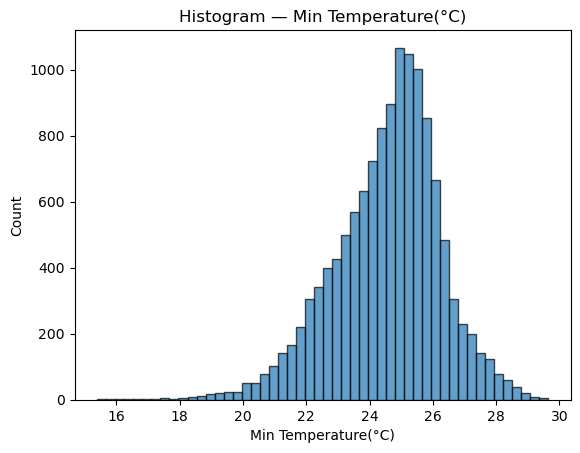

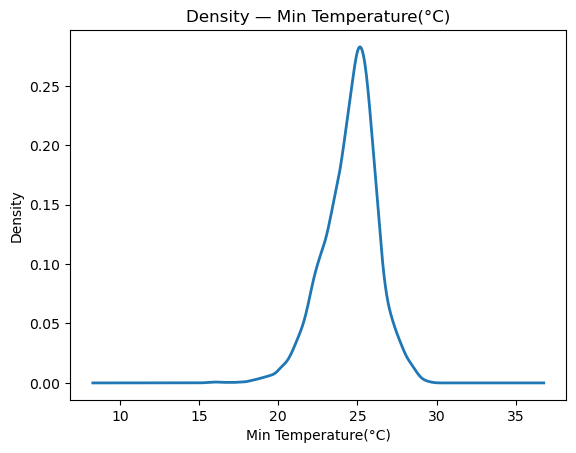

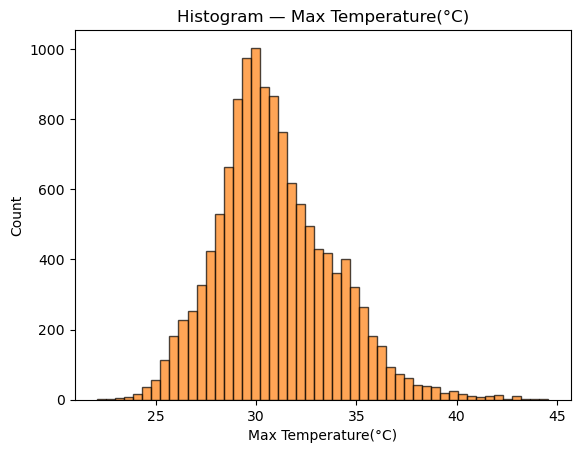

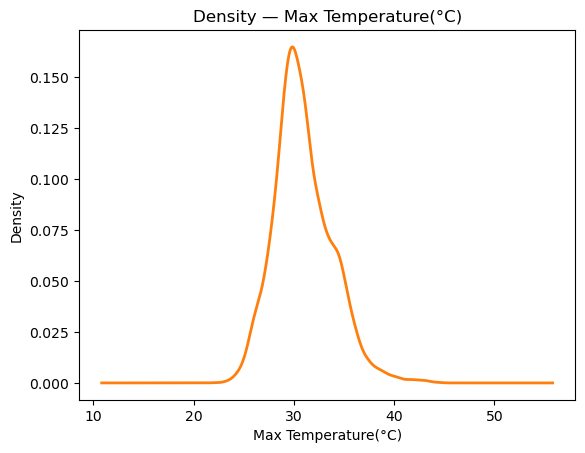

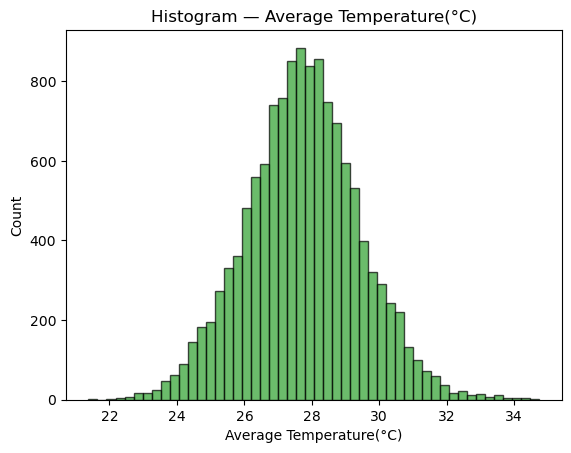

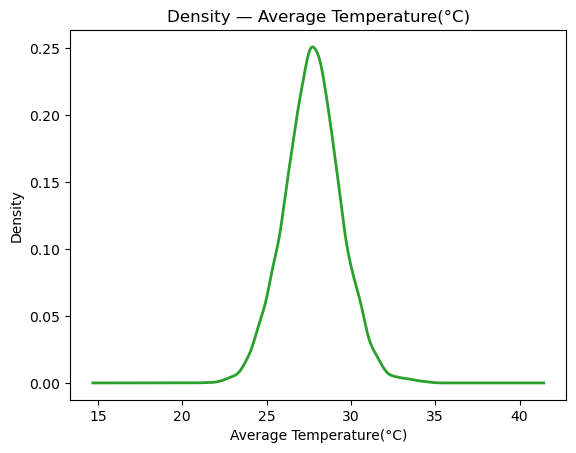

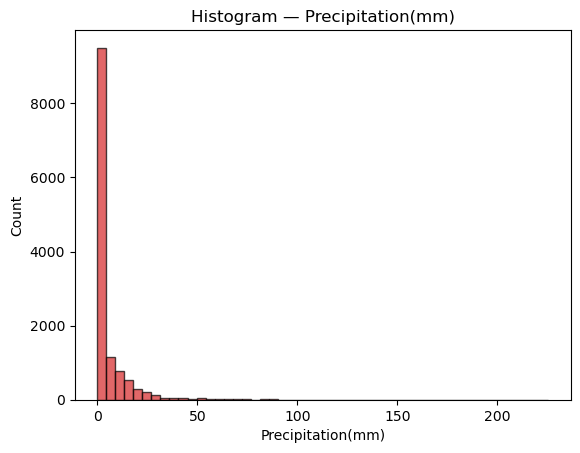

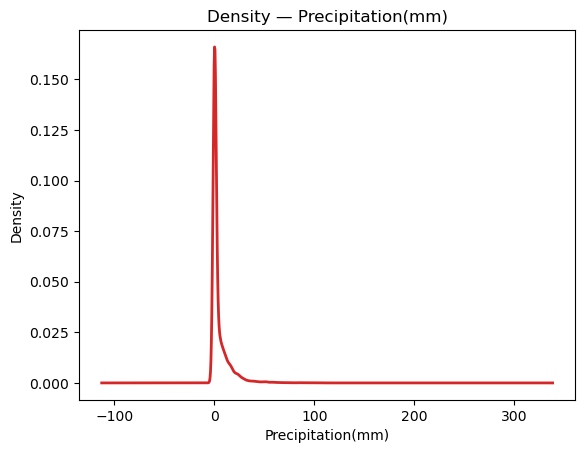

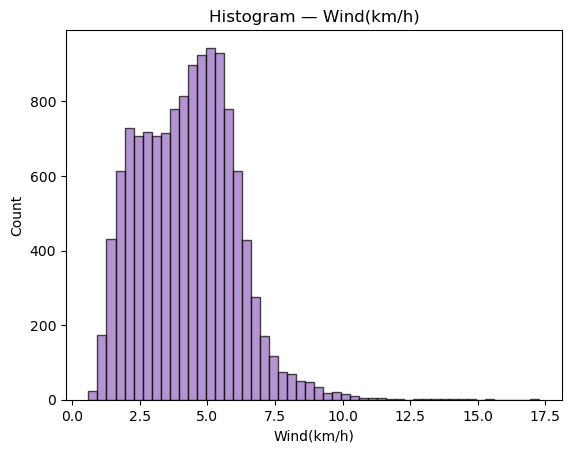

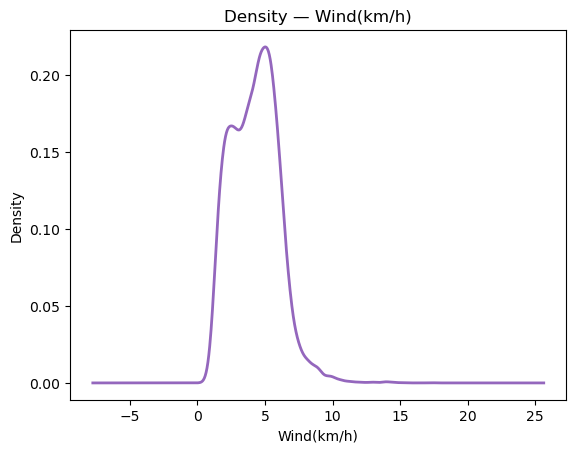

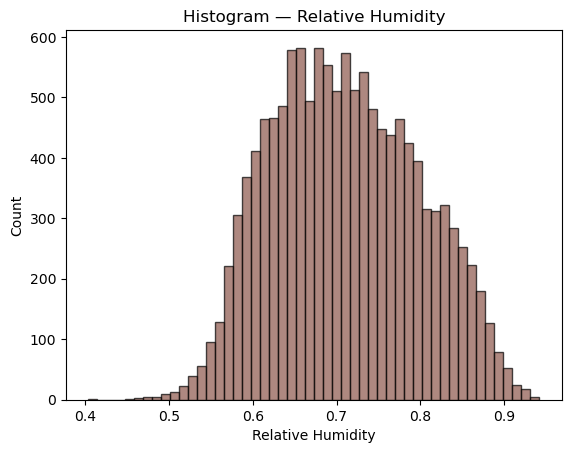

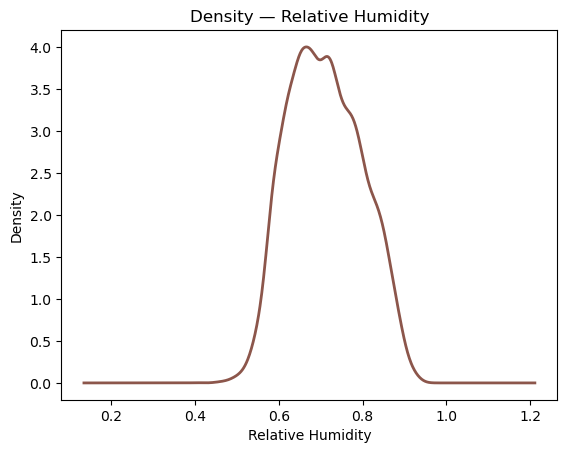

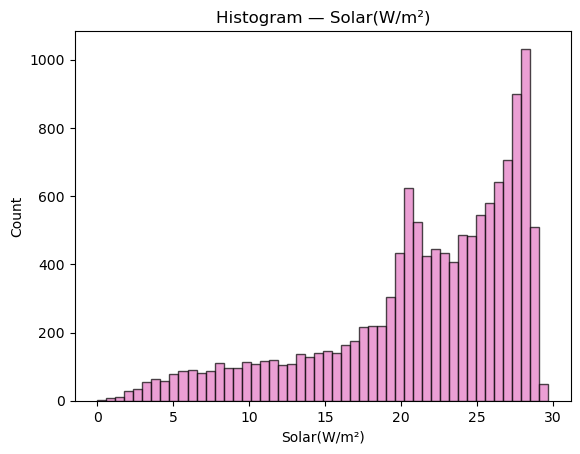

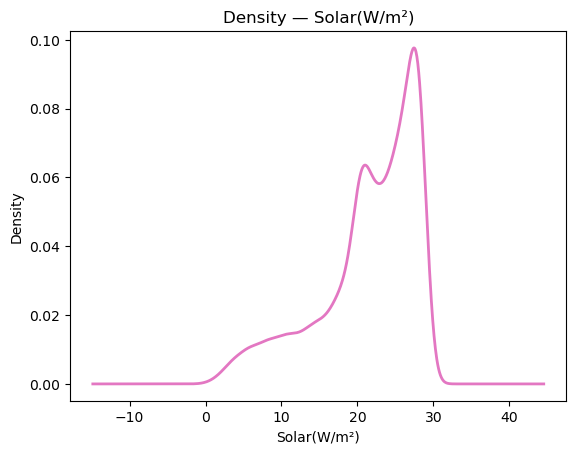

In [192]:
# Plotting Histograms and denstity plot to check if variables look normal or skewed
#Defining color maps so each predictor has its own color graph to distinguish from another predictor 
colors = plt.cm.tab10.colors
color_map={col:colors[i % len(colors)] for i , col in enumerate(NUM_COLS)}

for col in NUM_COLS:
    data = df[col].dropna()
    
    c= color_map[col]

    # Histogram
    plt.figure()
    plt.hist(data, bins=50, alpha=0.7,color=c,edgecolor="black")   
    plt.title(f"Histogram — {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    # Density (KDE)
    plt.figure()
    data.plot(kind="density",color=c,linewidth=2)
    plt.title(f"Density — {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


The histograms above show the distribution of each weather variable, highlighting the spread, central tendency, and presence of skewness or outliers. The overlaid density plots provide a smooth view of the underlying distribution, making it easier to compare variable shapes. Together, these plots reveal that temperature variables follow relatively normal-like distributions, while features such as precipitation and wind show skewness with extreme values, which may influence model performance.

**BOX/ WHISKERS PLOTS OUTLIER DETECTION**

Here trying to check for dots far from the box/whiskers = potential extreme events (e.g., heavy rain days, heat spikes).

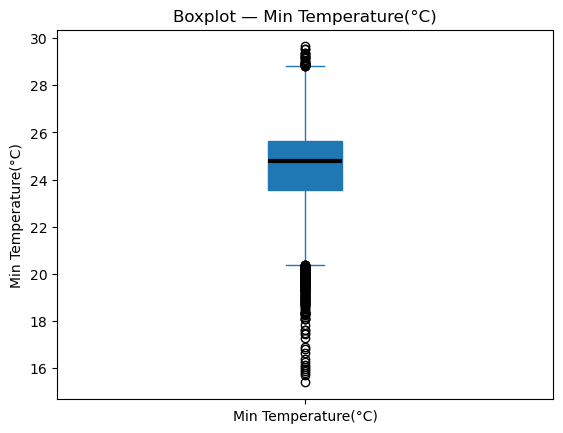

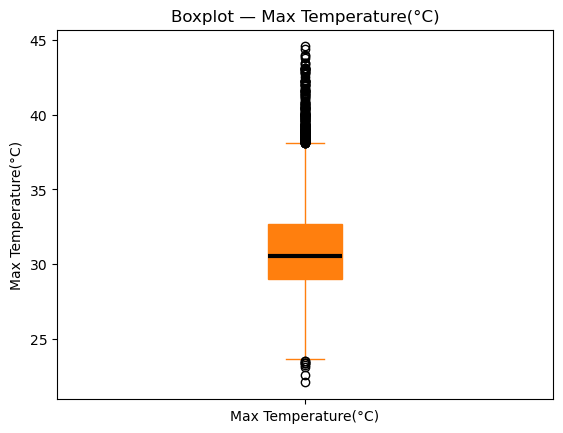

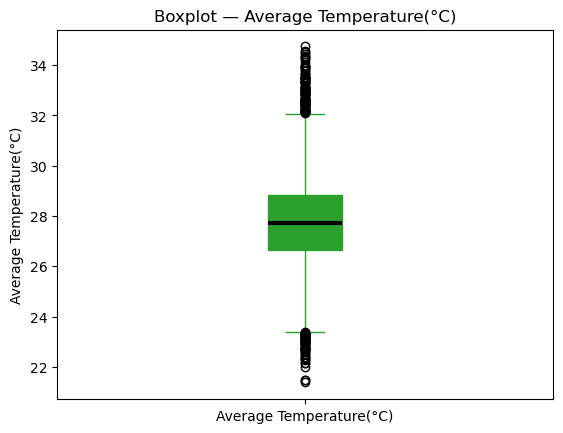

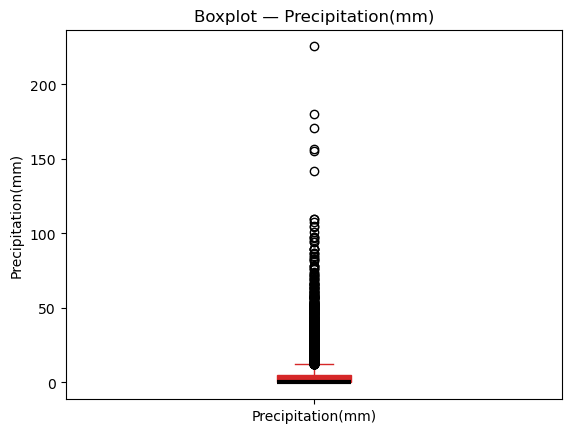

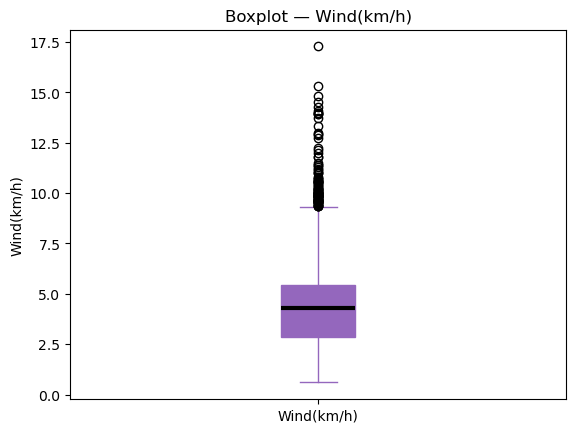

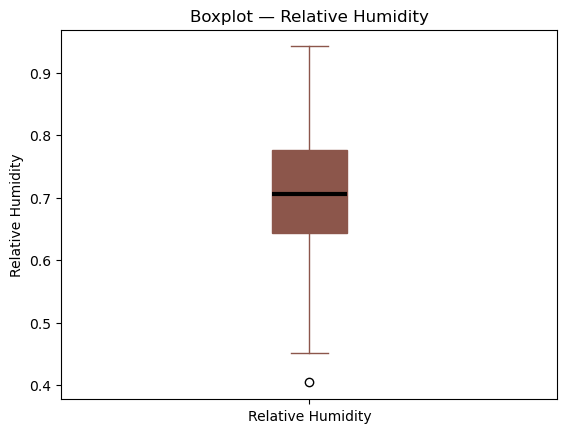

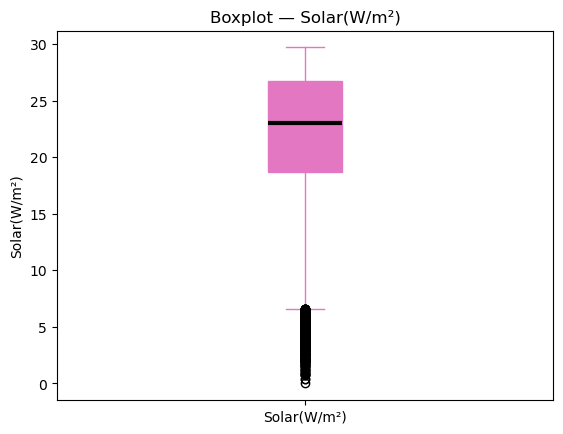

In [193]:

# Boxplots to Spot extreme (Outliers) values that might affect/ bias models.

# Defining the same color map as the above plots for consistancy 
colors = plt.cm.tab10.colors
color_map = {col: colors[i % len(colors)] for i, col in enumerate(NUM_COLS)}

# Boxplots
for col in NUM_COLS:
    data = df[col].dropna().values
    # pick color for this column
    c = color_map[col]  

    plt.figure()
    plt.boxplot(data,vert=True,labels=[col],showfliers=True,patch_artist=True,
        # box fill + edge color
        boxprops=dict(facecolor=c, color=c),
        # median line in black
        medianprops=dict(color="black", linewidth=3),whiskerprops=dict(color=c),capprops=dict(color=c))
    plt.title(f"Boxplot — {col}")
    plt.ylabel(col)
    plt.show()



The boxplots above display the spread and outliers for each weather variable. Temperatures (min, max, and average) are mostly stable, with some extreme highs and lows at the tails. Precipitation is highly skewed, showing mostly low daily values but many extreme rainfall outliers. Wind and solar radiation also exhibit noticeable outliers, though within a moderate range, while relative humidity remains more balanced with fewer extremes. These patterns highlight where variables are consistent versus where rare extreme events may bias or influence forecasting models.

**TEMPORAL ANALYSIS**

Checking for temporal analysis to see if this reveals his reveals annual cycles (e.g., more rain in some months , more solar radiation in mid-year)

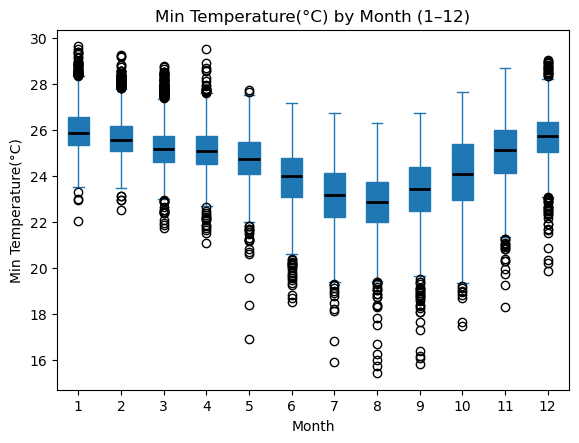

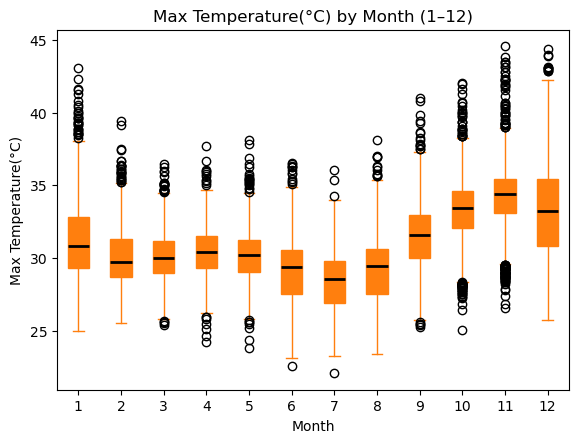

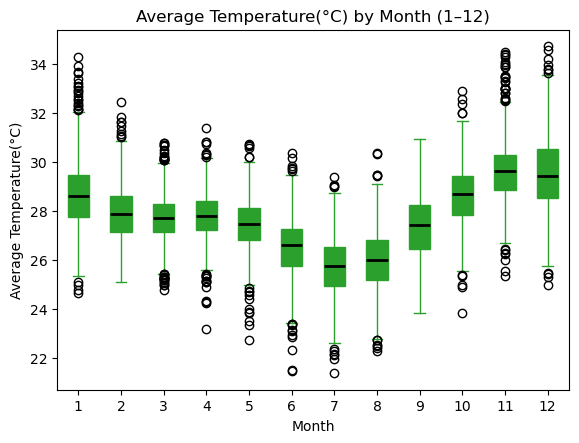

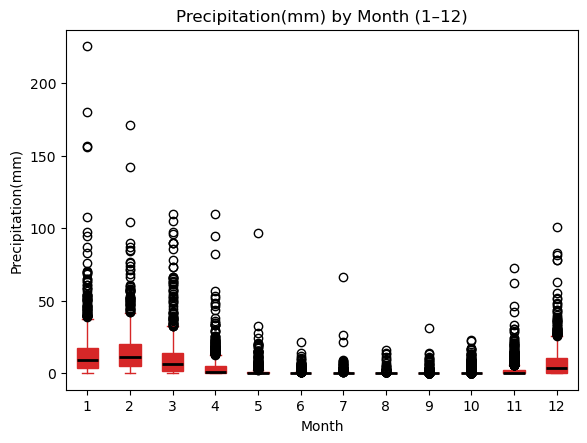

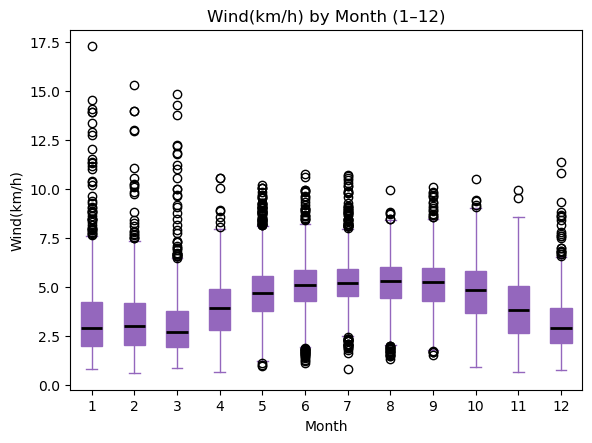

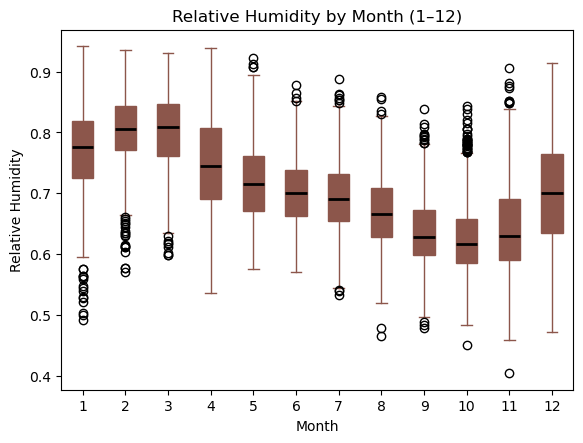

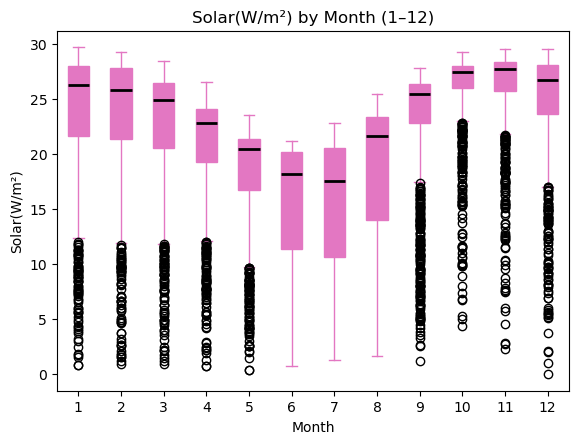

In [194]:

# Boxplots by month for each variable
if MONTH not in df.columns:
    df[MONTH] = df["Date"].dt.month



# color palette
colors = plt.cm.tab10.colors
color_map = {col: colors[i % len(colors)] for i, col in enumerate(NUM_COLS)}

for col in NUM_COLS:
    df.boxplot(
        column=col,
        by="Month",
        grid=False,
        patch_artist=True,   # allows filling with color
        boxprops=dict(facecolor=color_map[col], color=color_map[col]),
        whiskerprops=dict(color=color_map[col]),
        capprops=dict(color=color_map[col]),
        medianprops=dict(color="black", linewidth=2),
    )
    plt.title(f"{col} by Month (1–12)")
    plt.suptitle("")  
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()




The monthly boxplots above highlight clear seasonal patterns across all weather variables. Minimum, maximum, and average temperatures follow expected cycles, dipping mid-year (June–July) and peaking toward December–January. Precipitation is highly skewed, with most months showing low rainfall but extreme outliers during the rainy season. Wind speeds remain relatively stable with moderate variation, while relative humidity and solar radiation exhibit opposite seasonal trends humidity is higher in the early months, whereas solar intensity peaks later in the year. These temporal patterns are important for capturing seasonality in forecasting models.




Extreme Events, defining extremes using quantiles (e.g., “top 1% of max temperature values”

In [195]:
# Choosing which variables to flag for extremes
# top 1% max temperatures
# top 1% precipitation
# top 1% wind
extreme_values = {
    MAX_TEMP:0.99,   
    MIN_TEMP:0.99,
    PRECIP:0.99,   
    WIND:0.99,}   

# Creating the flags
for col, i in extreme_values.items():
    thresh = df[col].quantile(i)
    flag_col = f"Extreme_Days_{col}"
    df[flag_col] = df[col] > thresh
    print(f"{col}: threshold for top {int((1-i)*100)}% = {thresh:.3f}")

# Counting the number of days there was extreme events in the data set 
flag_cols = [c for c in df.columns if c.startswith("Extreme_Days_")]
extreme_counts = df[flag_cols].sum().sort_values(ascending=False)
print("\nNumber of days Extreme events occured :")
print(extreme_counts)


Max Temperature(°C): threshold for top 1% = 39.142
Min Temperature(°C): threshold for top 1% = 28.218
Precipitation(mm): threshold for top 1% = 49.311
Wind(km/h): threshold for top 1% = 8.950

Number of days Extreme events occured :
Extreme_Days_Max Temperature(°C)    129
Extreme_Days_Min Temperature(°C)    129
Extreme_Days_Wind(km/h)             129
Extreme_Days_Precipitation(mm)      128
dtype: int64


## 3. Time Series and Seasonal Patterns  

#### Hypotheses / Questions:

5. Do temperatures and other climate variables show clear seasonal patterns over the years?
6. Are there long-term trends in warming, cooling, or rainfall changes that emerge when comparing across decades?

#### Why it’s beneficial
Weather data is inherently temporal and seasonal. Distribution analysis reveals cycles (daily, monthly, yearly) and long-term trends. Rolling averages help detect climate change signals or data drift.
#### What we’re looking for
Autocorrelation – strong autocorrelation means past values are highly predictive of future ones.
Seasonal peaks – clear yearly or monthly cycles indicate seasonal features must be included.
Trend slopes – upward temperature trend shows stationarity is violated; linear regression without detrending may fail.
#### Impact on model choice
**General models:** Linear regression may work if lagged variables (e.g., yesterday’s temperature, last week’s average) and explicit seasonal terms are added, but it struggles when stationarity is violated. Time-series models such as ARIMA or LSTM are better suited for autocorrelated, seasonal data since they directly account for temporal dependencies. **Tree-based models** (Random Forest, Gradient Boosting) can also capture non-linear seasonality and long-term shifts without needing strict assumptions, making them more robust than plain regression for weather forecasting.

**Time series Decomposition**

Time series decomposition separates a dataset into seasonality, trend, and residuals. Seasonality captures repeating yearly cycles, trends show long-term increases or decreases, and residuals represent random noise that cannot be explained by either. This breakdown helps reveal both predictable patterns and unpredictable fluctuations in the data.

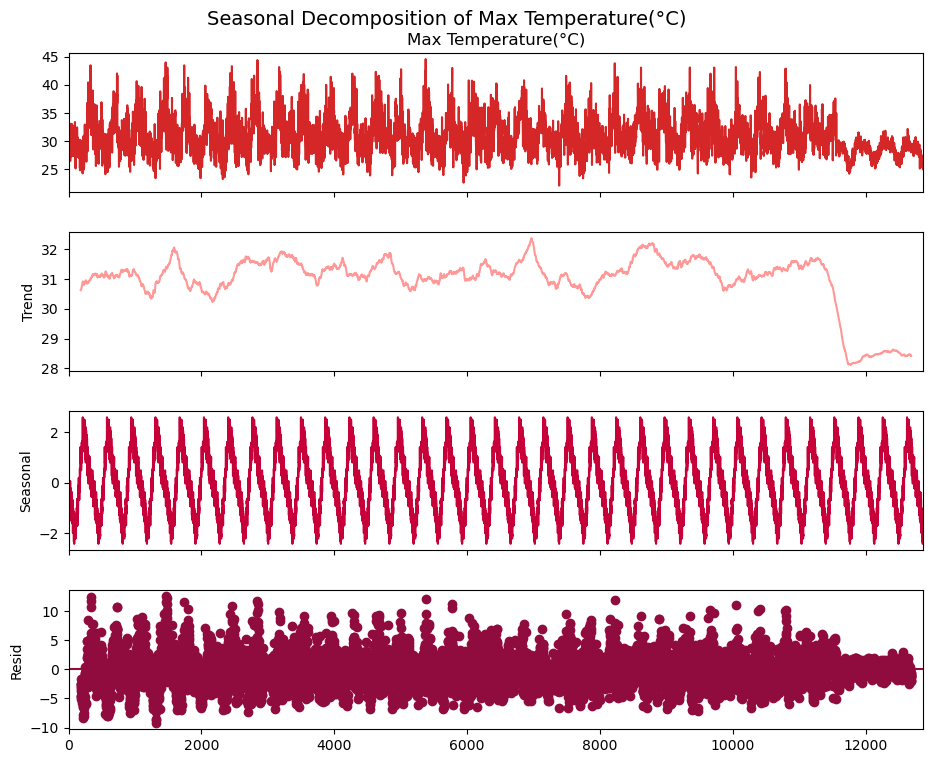

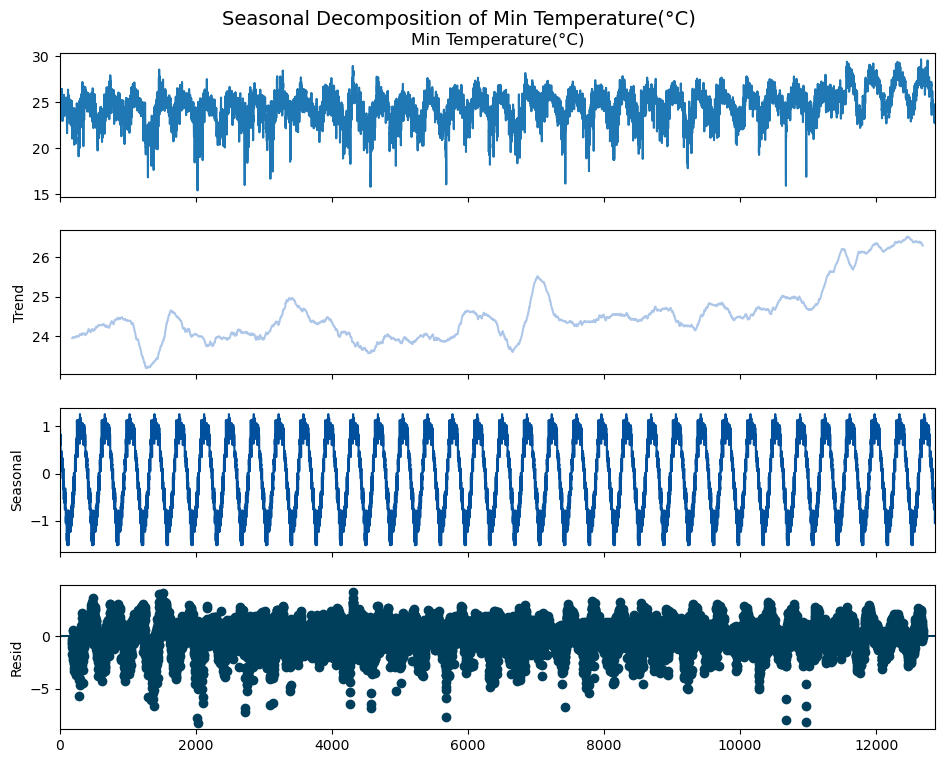

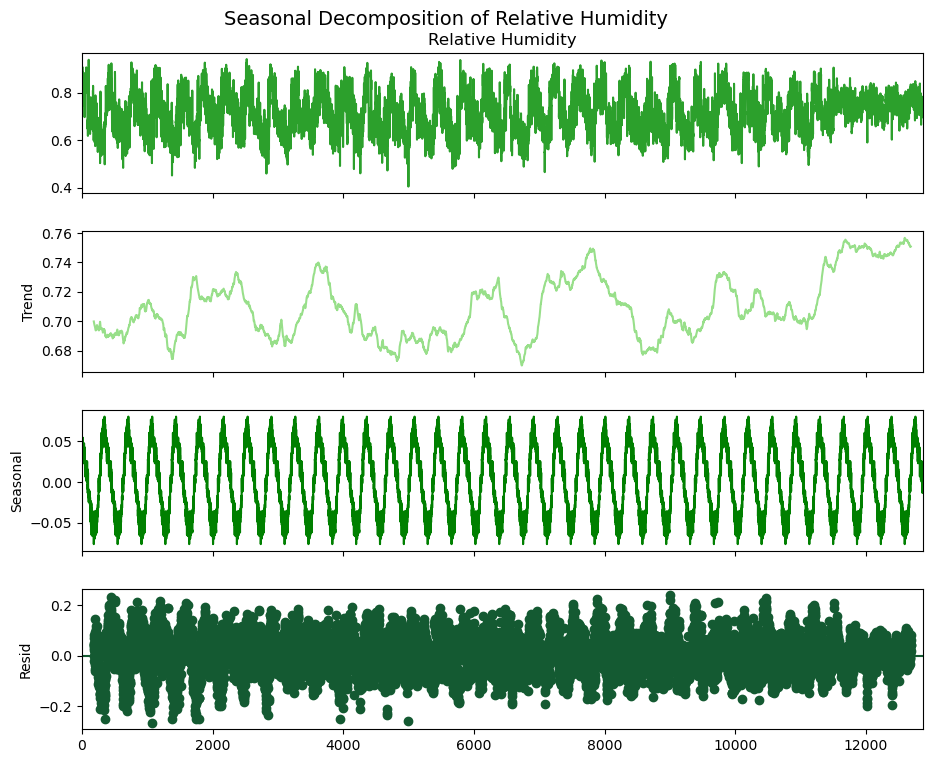

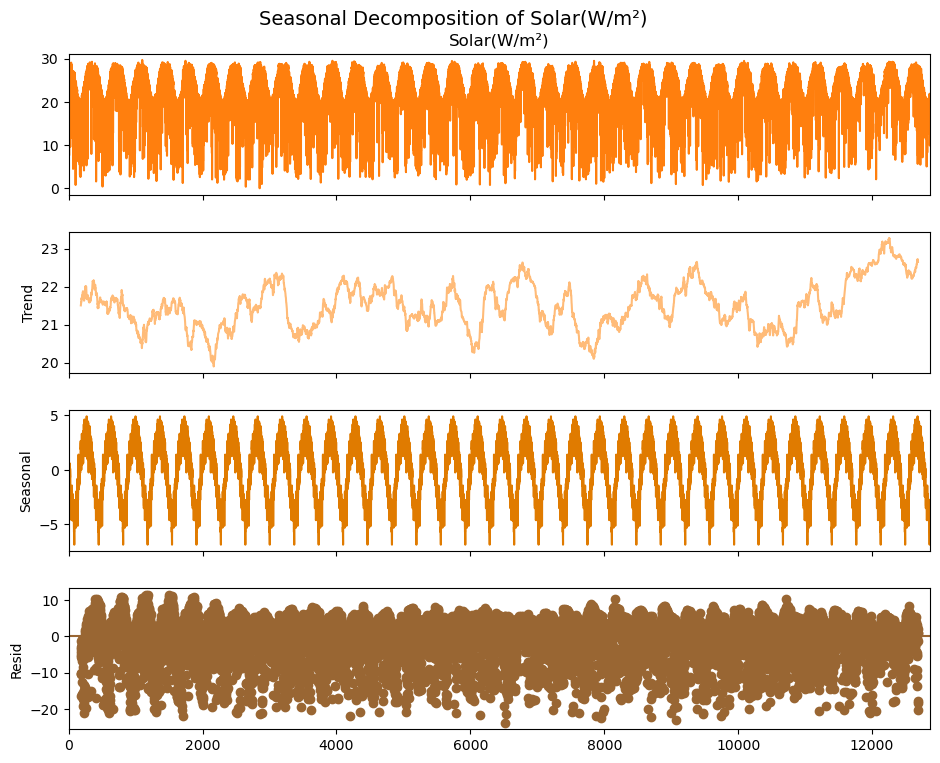

In [196]:
#This block of code performs seasonal decomposition for each selected variable (e.g., temperature, humidity, solar).
#The series is broken into trend, seasonal, and residual components using an additive model, with a period of 365 days to capture yearly cycles. 
#This helps to separate long-term trends from repeating seasonal effects and irregular noise.

# Variables worth decomposing
vars_to_decompose = [
    'Max Temperature(°C)',
    'Min Temperature(°C)',
    'Relative Humidity',
    'Solar(W/m²)'
]

# Defining custom colors (pick 4 sets for variety per variable)
color_sets = {
    'Max Temperature(°C)': ['#d62728', '#ff9896', '#c70039', '#900c3f'],  
    'Min Temperature(°C)': ['#1f77b4', '#aec7e8', '#00509e', '#003f5c'],  
    'Relative Humidity':   ['#2ca02c', '#98df8a', '#008000', '#145a32'],  
    'Solar(W/m²)':         ['#ff7f0e', '#ffbb78', '#e07b00', '#996633']   
}

for col in vars_to_decompose:
    result = seasonal_decompose(df[col], model='additive', period=365)

    fig = result.plot()
    fig.set_size_inches(10, 8)
    
    # Apply custom colors
    axes = fig.get_axes()
    for ax, color in zip(axes, color_sets[col]):
        for line in ax.get_lines():
            line.set_color(color)

    plt.suptitle(f"Seasonal Decomposition of {col}", fontsize=14)
    plt.show()




**Autocorrelation** 

Autocorrelation describes how the current value of a time series relates to its past values. It helps identify whether patterns repeat over time, which is critical for forecasting.

Positive autocorrelation: High values are followed by other high values, and low values by low values.

Negative autocorrelation: High values are followed by low values, and vice versa.

To detect autocorrelation, two main tools are used:

Autocorrelation Function (ACF) plot – shows correlations across many time lags.
Partial Autocorrelation Function (PACF) plot – shows the direct effect of specific lags after removing intermediate ones.

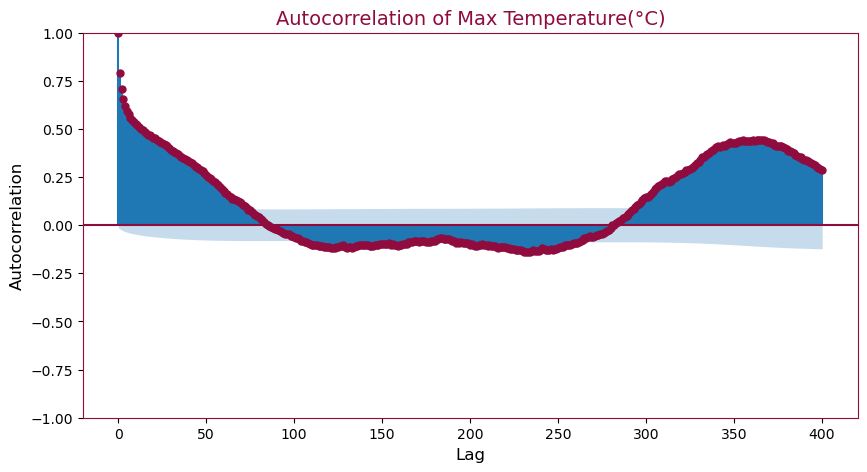

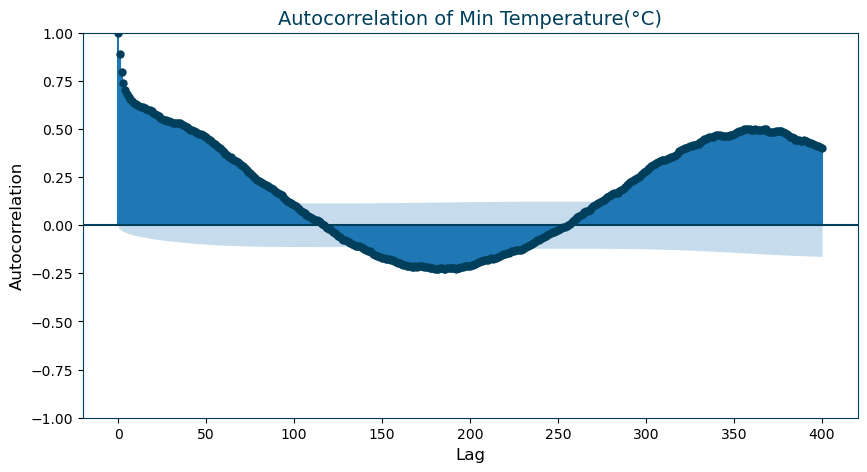

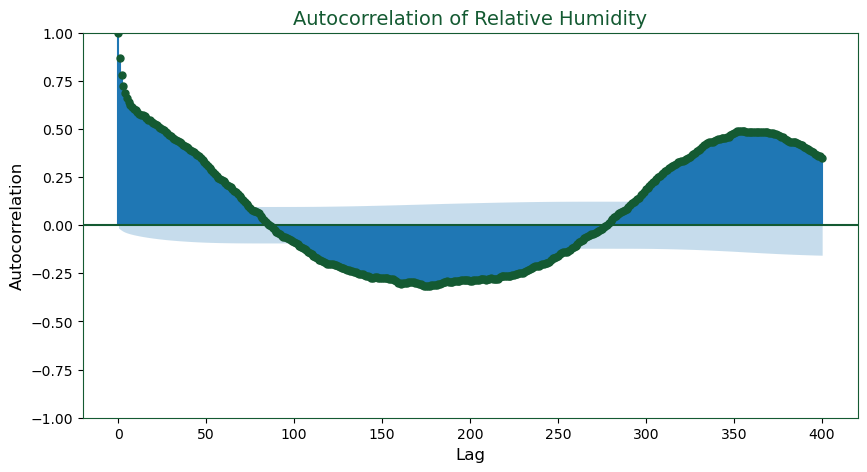

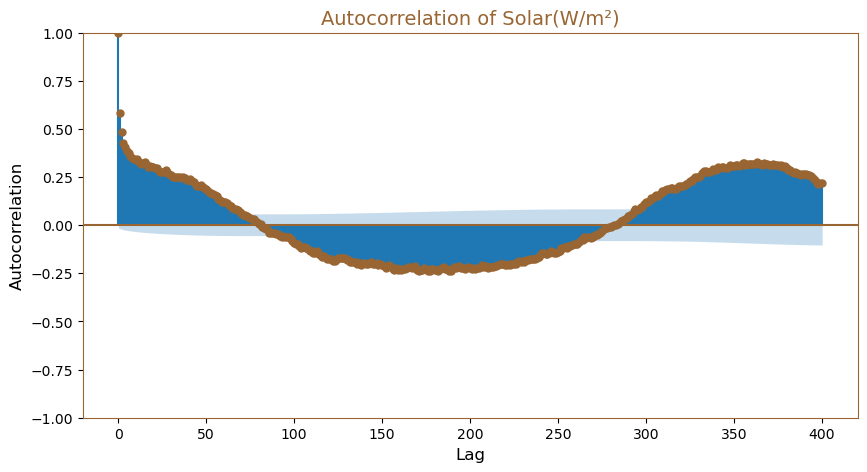

In [197]:
#This block of code generates Autocorrelation Function (ACF) plots for each variable, 
#showing how current values are correlated with past values across up to 400 lags (just over one year for daily data). 
#ACF helps detect seasonality, persistence, and repeating patterns in the dataset, which are important for forecasting.

# Variables to check
vars_to_check = [
    'Max Temperature(°C)',
    'Min Temperature(°C)',
    'Relative Humidity',
    'Solar(W/m²)'
]

# Assigning distinct colors for each variable
colors = {
    'Max Temperature(°C)': '#900c3f',
    'Min Temperature(°C)': '#003f5c',
    'Relative Humidity': '#145a32',
    'Solar(W/m²)': '#996633'
}

for col in vars_to_check:
    fig, ax = plt.subplots(figsize=(10,5))
    plot_acf(df[col], lags=400, ax=ax, color=colors[col])  
    
    # Title and styling
    plt.title(f"Autocorrelation of {col}", fontsize=14, color=colors[col])
    ax.set_xlabel("Lag", fontsize=12)
    ax.set_ylabel("Autocorrelation", fontsize=12)
    ax.spines['top'].set_color(colors[col])
    ax.spines['right'].set_color(colors[col])
    ax.spines['left'].set_color(colors[col])
    ax.spines['bottom'].set_color(colors[col])
    plt.show()


The autocorrelation plots for maximum temperature, minimum temperature, relative humidity, and solar radiation all show strong positive correlations at short lags, which gradually decay as the lag increases. This indicates that weather conditions on a given day are closely related to conditions on recent days. In addition, clear peaks reappear around lag ~365, confirming the presence of a strong annual seasonal cycle across these variables. The similarity in patterns for temperature, humidity, and solar radiation highlights that they share common seasonal drivers such as annual climatic cycles. These findings support the hypothesis that weather variables follow long-term seasonal trends and justify the inclusion of temporal features in the modelling stage.

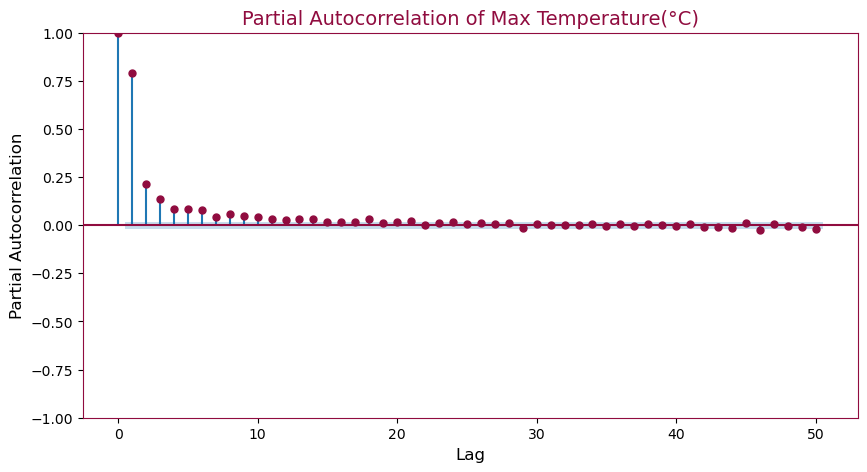

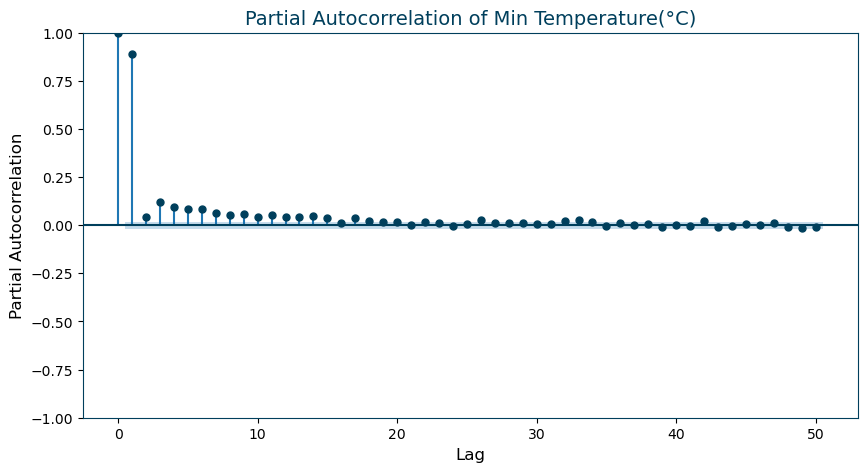

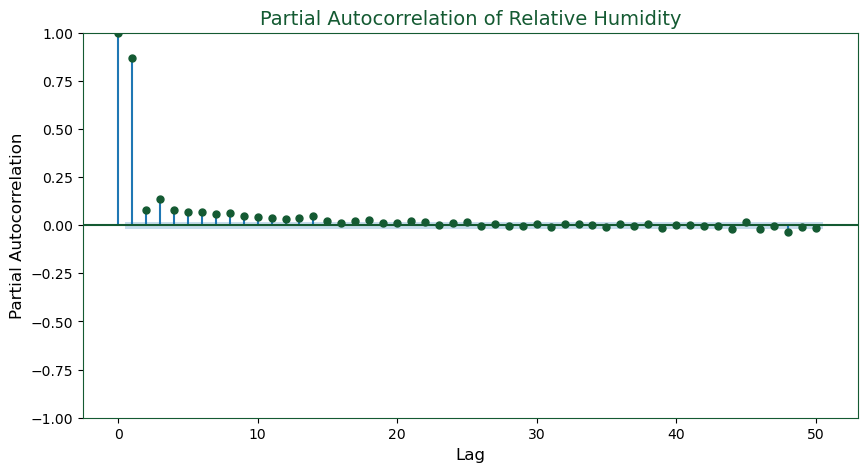

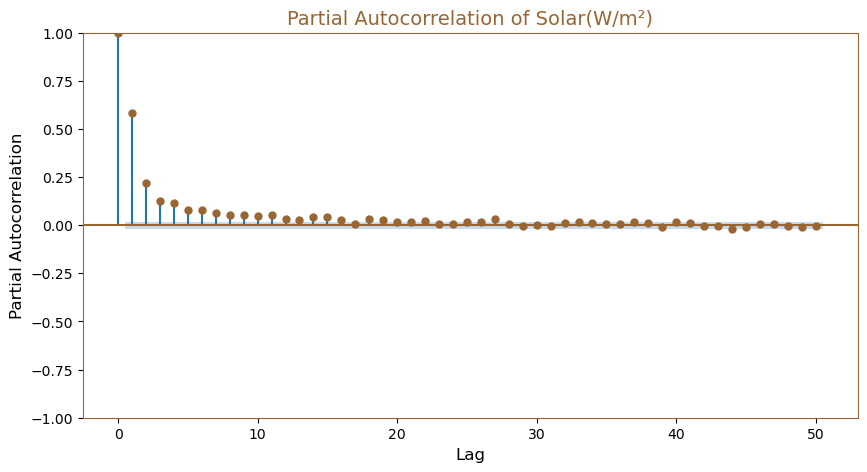

In [198]:
#This block of code produces Partial Autocorrelation Function (PACF) plots for each variable,
#focusing on the direct influence of specific lags (up to 50). 
#Unlike ACF, PACF removes the indirect effects of shorter lags, 
#making it clearer which recent past values directly affect the present. 
#This is useful for understanding short-term dependencies in weather variables.

# Variables to check

vars_to_check = [
    'Max Temperature(°C)',
    'Min Temperature(°C)',
    'Relative Humidity',
    'Solar(W/m²)'
]

# Assigning distinct colors for each variable
colors = {
    'Max Temperature(°C)': '#900c3f',
    'Min Temperature(°C)': '#003f5c',
    'Relative Humidity': '#145a32',
    'Solar(W/m²)': '#996633'
}

for col in vars_to_check:
    fig, ax = plt.subplots(figsize=(10,5))
    plot_pacf(df[col], lags=50, ax=ax, color=colors[col])  
    
    # Title and styling
    plt.title(f"Partial Autocorrelation of {col}", fontsize=14, color=colors[col])
    ax.set_xlabel("Lag", fontsize=12)
    ax.set_ylabel("Partial Autocorrelation", fontsize=12)
    ax.spines['top'].set_color(colors[col])
    ax.spines['right'].set_color(colors[col])
    ax.spines['left'].set_color(colors[col])
    ax.spines['bottom'].set_color(colors[col])
    plt.show()


The partial autocorrelation plots show strong spikes at lag 1 for all variables, indicating that the immediate past day has the greatest direct influence on current values. Smaller but still visible correlations extend to short lags (up to around 5–7 days), suggesting short-term persistence in weather conditions. Beyond these lags, the PACF values drop close to zero, meaning that longer-term correlations are largely explained by the seasonal cycles already captured in the ACF. Together, the PACF results confirm that weather variables are strongly influenced by their most recent past values, while broader seasonal effects appear indirectly through repeated yearly cycles. This supports the inclusion of both short-term lagged features and longer-term seasonal indicators in the modelling stage.

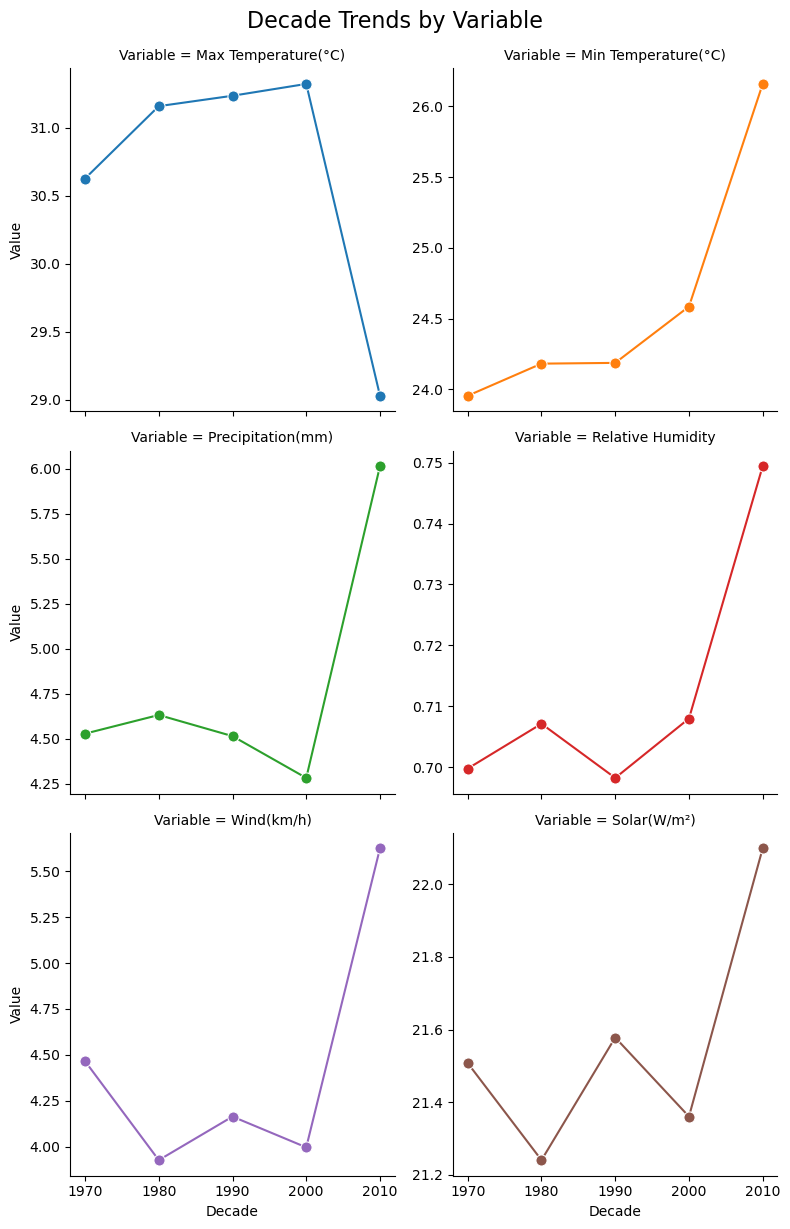

In [199]:
# Trend comparison across decades

# selecting the columns needed 
# keeping only columns that exist
# checking if values are numeric
# then create a decade key
cols = ['Max Temperature(°C)','Min Temperature(°C)','Precipitation(mm)',
        'Relative Humidity','Wind(km/h)','Solar(W/m²)']
cols = [c for c in cols if c in df.columns]                 
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')   
df['Decade'] = (df['Year'] // 10) * 10                      

# decade averages -> long form for faceting
decade_avg  = df.groupby('Decade')[cols].mean(numeric_only=True)
decade_long = decade_avg.reset_index().melt(
    id_vars='Decade', var_name='Variable', value_name='Value'
).dropna(subset=['Value'])

# Removing FutureWarning from seaborn/pandas about use_inf_as_na
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*", category=FutureWarning)

# Melting data for facet plotting
decade_long = decade_avg.reset_index().melt(id_vars="Decade", var_name="Variable", value_name="Value")

# Define color palette (one color per variable)
palette = dict(zip(cols,
    sns.color_palette("tab10", n_colors=len(cols))  # tab10 gives distinct colors
))

# Facet plot with custom colors
plot = sns.FacetGrid(
    decade_long,
    col="Variable",
    col_wrap=2,
    sharey=False,
    height=4
)

# Map lineplot and use palette by variable
plot.map_dataframe(
    sns.lineplot,
    x="Decade",
    y="Value",
    hue="Variable",
    marker="o",
    markersize=8,
    palette=palette,
    legend=False
)

plot.fig.suptitle("Decade Trends by Variable", fontsize=16, y=1.02)
plt.show()



Overall, the temporal analysis demonstrates that the dataset contains both short-term persistence and long-term seasonality, reinforced by clear decade-level variability. These insights support the hypothesis that weather patterns are influenced by recent past values, seasonal cycles, and gradual climate shifts. For modelling, this confirms the need for approaches that can capture complex temporal dependencies and interactions, such as Random Forests, which are capable of leveraging both lagged predictors and non-linear seasonal effects.

## 4. Correlation relationship and Analysis 

#### Hypotheses / Questions:

7. Is temperature strongly correlated with solar radiation and humidity?
8. Do wind and precipitation add predictive power or are they weakly related?

#### Why it’s beneficial
Shows how predictors interact with temperature (the target). Identifies multicollinearity (predictors too correlated with each other). Helps prioritize which variables should go into the model.
#### What we’re looking for
Correlation with target (Max Temp/Min Temp): High correlation (e.g., solar vs Max Temp = 0.7)  strong predictor. Low correlation (e.g., wind vs Max Temp = 0.1)  may not add much value.
Multicollinearity among predictors: If two predictors are highly correlated (e.g., humidity vs precipitation, r > 0.85), one may be redundant.
Partial correlations: Example: humidity negatively correlated with Max Temp, even when solar is controlled.
#### Impact on model choice
**Tree-based models** (Random Forest, XGBoost) handle multicollinearity better by automatically choosing dominant splits and down-weighting redundant predictors. Neural networks can capture nonlinear interactions (e.g., Max Temp rising with solar only when humidity is low), but require larger datasets to generalize well.
**General models:** Linear RegressionAssumes low multicollinearity. High collinearity inflates coefficients and produces unstable results (VIF > 10 = problematic). Strong predictor–target correlations mean regression could perform well, but redundancy must be managed.


In [200]:
#Computing Correlation Matrices
#Checking both Pearson (linear relationships) and Spearman (monotonic relationships, more robust to non-linearity).



# Numeric columns of interest
numeric_cols = ['Min Temperature(°C)', 'Max Temperature(°C)', 'Average Temperature(°C)', 
                'Precipitation(mm)', 'Wind(km/h)', 'Relative Humidity', 'Solar(W/m²)']

# Computing correlations
pearson_corr = df[numeric_cols].corr(method='pearson')
spearman_corr = df[numeric_cols].corr(method='spearman')

# Converting to DataFrames for better visualization
pearson_df = pd.DataFrame(pearson_corr)
spearman_df = pd.DataFrame(spearman_corr)

# Displaying them side by side 

print("Pearson Correlation Matrix")
display(pearson_df)

print(" Spearman Correlation Matrix")
display(spearman_df)



Pearson Correlation Matrix


Min Temperature(°C)  Max Temperature(°C)  \
Min Temperature(°C)                    1.000                0.032   
Max Temperature(°C)                    0.032                1.000   
Average Temperature(°C)                0.526                0.867   
Precipitation(mm)                      0.286               -0.201   
Wind(km/h)                             0.069               -0.424   
Relative Humidity                      0.361               -0.487   
Solar(W/m²)                            0.135                0.614   

                         Average Temperature(°C)  Precipitation(mm)  \
Min Temperature(°C)                        0.526              0.286   
Max Temperature(°C)                        0.867             -0.201   
Average Temperature(°C)                    1.000             -0.028   
Precipitation(mm)                         -0.028              1.000   
Wind(km/h)                                -0.326             -0.050   
Relative Humidity                         -0.234              0.568   
Solar(W/m²)                                0.589             -0.079   

                         Wind(km/h)  Relative Humidity  Solar(W/m²)  
Min Temperature(°C)           0.069              0.361        0.135  
Max Temperature(°C)          -0.424             -0.487        0.614  
Average Temperature(°C)      -0.326             -0.234        0.589  
Precipitation(mm)            -0.050              0.568       -0.079  
Wind(km/h)                    1.000             -0.204       -0.254  
Relative Humidity            -0.204              1.000       -0.309  
Solar(W/m²)                  -0.254             -0.309        1.000

 Spearman Correlation Matrix


Min Temperature(°C)  Max Temperature(°C)  \
Min Temperature(°C)                    1.000                0.063   
Max Temperature(°C)                    0.063                1.000   
Average Temperature(°C)                0.547                0.838   
Precipitation(mm)                      0.477               -0.273   
Wind(km/h)                            -0.011               -0.398   
Relative Humidity                      0.382               -0.510   
Solar(W/m²)                            0.186                0.630   

                         Average Temperature(°C)  Precipitation(mm)  \
Min Temperature(°C)                        0.547              0.477   
Max Temperature(°C)                        0.838             -0.273   
Average Temperature(°C)                    1.000              0.024   
Precipitation(mm)                          0.024              1.000   
Wind(km/h)                                -0.330             -0.297   
Relative Humidity                         -0.223              0.797   
Solar(W/m²)                                0.617             -0.112   

                         Wind(km/h)  Relative Humidity  Solar(W/m²)  
Min Temperature(°C)          -0.011              0.382        0.186  
Max Temperature(°C)          -0.398             -0.510        0.630  
Average Temperature(°C)      -0.330             -0.223        0.617  
Precipitation(mm)            -0.297              0.797       -0.112  
Wind(km/h)                    1.000             -0.249       -0.269  
Relative Humidity            -0.249              1.000       -0.294  
Solar(W/m²)                  -0.269             -0.294        1.000

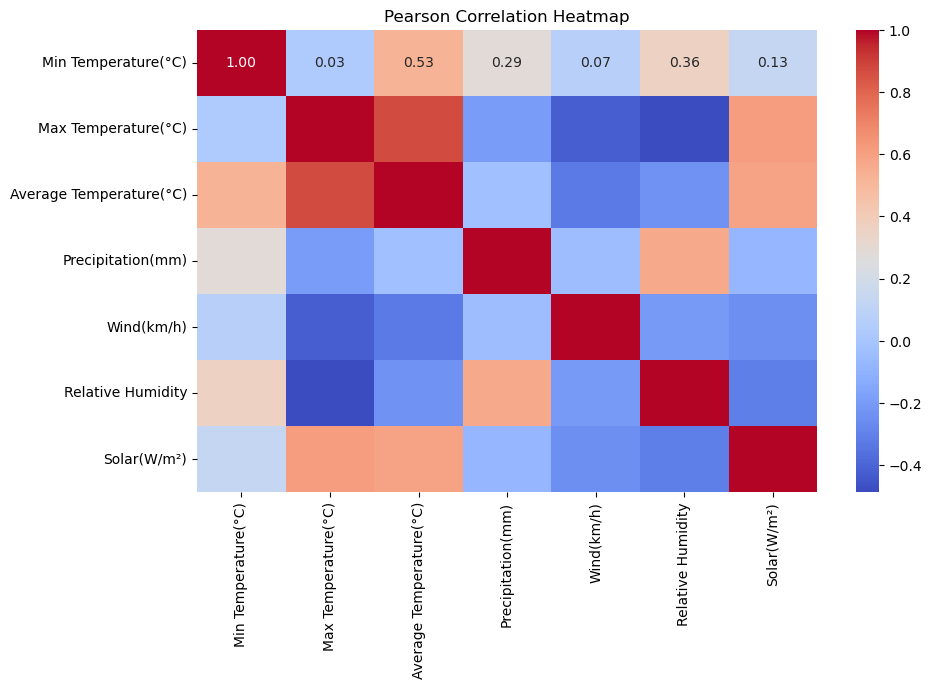

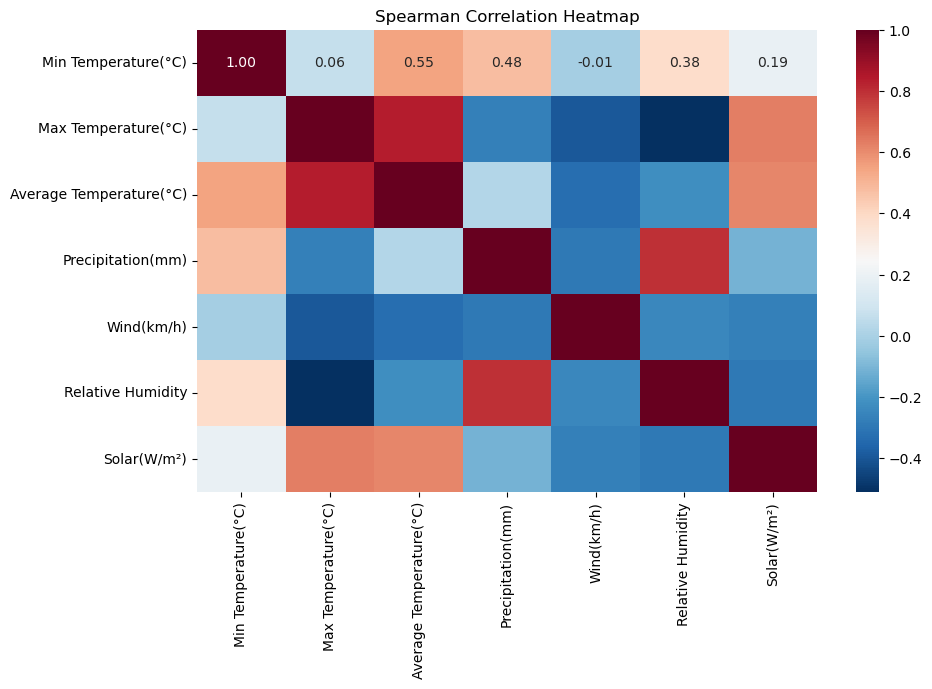

In [201]:
# Visualizing the relationship between variables 


# Pearson Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Spearman Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(spearman_corr, annot=True, cmap="RdBu_r", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()


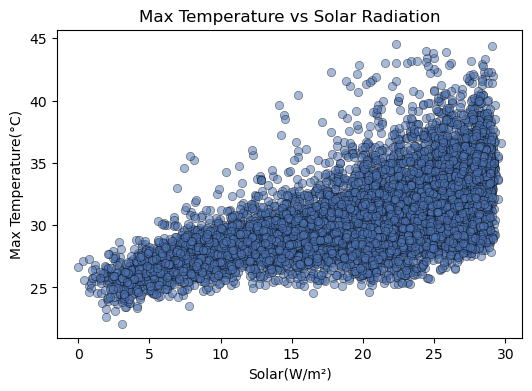

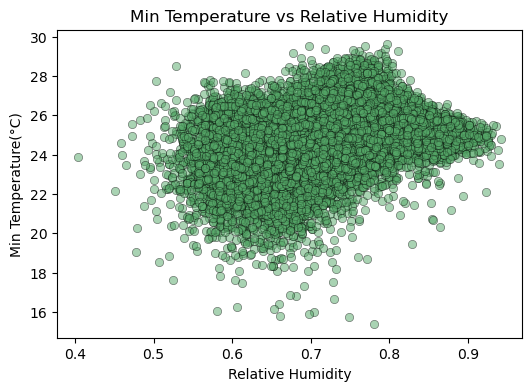

In [202]:
#Scatterplots for Hypothesis Testing
#Max Temp vs. Solar
#Min Temp vs. Humidity

# Scatterplot Max Temp vs Solar
plt.figure(figsize=(6,4))
sns.scatterplot(x='Solar(W/m²)', y='Max Temperature(°C)', data=df,color=sns.color_palette("deep")[0], alpha=0.5, edgecolor="black")
plt.title("Max Temperature vs Solar Radiation")
plt.show()

# Scatterplot Min Temp vs Humidity
plt.figure(figsize=(6,4))
sns.scatterplot(x='Relative Humidity', y='Min Temperature(°C)', data=df,color=sns.color_palette("deep")[2], alpha=0.5, edgecolor="black")
plt.title("Min Temperature vs Relative Humidity")
plt.show()


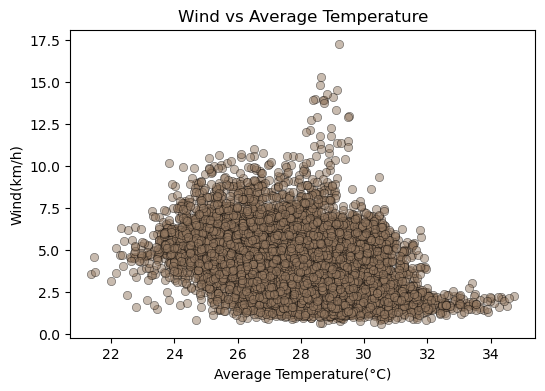

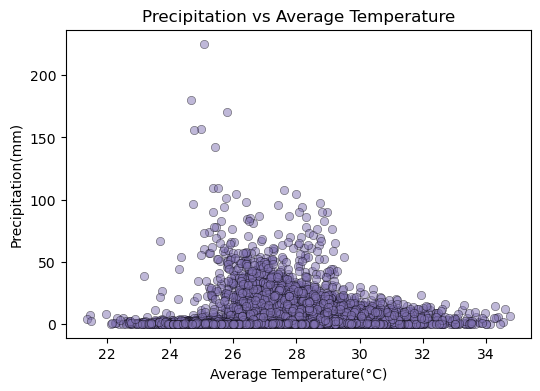

In [203]:
# Scatterplot Wind vs Avg Temp
plt.figure(figsize=(6,4))
sns.scatterplot(x='Average Temperature(°C)',y='Wind(km/h)', data=df, color=sns.color_palette("deep")[5], alpha=0.5, edgecolor="black")
plt.title("Wind vs Average Temperature")
plt.show()

# Scatterplot Precipitation vs Avg Temp
plt.figure(figsize=(6,4))
sns.scatterplot(x='Average Temperature(°C)',y='Precipitation(mm)', data=df, color=sns.color_palette("deep")[4], alpha=0.5, edgecolor="black")
plt.title("Precipitation vs Average Temperature")
plt.show()


**CORRELATION ANALYSIS:** 

The Pearson and Spearman heatmaps both reveal strong positive correlations between solar radiation and maximum temperature, confirming that higher solar intensity drives higher daytime temperatures. This is further illustrated in the scatterplot of Max Temperature vs Solar Radiation, which shows a clear upward trend. Similarly, minimum temperature shows a moderate negative relationship with relative humidity, reflected in the scatterplot where higher humidity is associated with slightly lower minimum temperatures. Wind speed and average temperature display a weak relationship, though some outliers suggest occasional spikes in wind under moderate temperatures. Precipitation shows little consistent correlation with average temperature, as most values cluster near zero but with extreme rainfall events acting as outliers. Overall, the combined heatmaps and scatterplots confirm that solar radiation and humidity are the most influential predictors for temperature, while wind and precipitation have weaker, less stable relationships.


# Preprocessing 

Outlier Handling + Scaling

Outlier Handling with IQR Clipping

The IQRClipper transformer calculates the interquartile range (IQR) for each feature and sets lower/upper bounds at 1.5 × IQR below Q1 and above Q3.

Any values outside this range are clipped (not removed) to the boundary.

This ensures extreme outliers do not distort the scale of features, while still retaining all observations.

After clipping, features are scaled using StandardScaler (z-score normalisation).

This standardises each feature to have mean 0 and variance 1, which helps many models learn more effectively by removing bias from features measured on different scales.

Optionally, MinMaxScaler can be used instead if normalisation to a 0–1 range is more appropriate.

In [204]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# --- Outlier handler (IQR clipper, keeps data but caps extremes) ---
class IQRClipper(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        self.bounds_ = {}

    def fit(self, X, y=None):
        df = pd.DataFrame(X, columns=self.cols) if not isinstance(X, pd.DataFrame) else X
        for col in self.cols:
            q1, q3 = df[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            self.bounds_[col] = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
        return self

    def transform(self, X):
        df = pd.DataFrame(X, columns=self.cols) if not isinstance(X, pd.DataFrame) else X.copy()
        for col, (low, high) in self.bounds_.items():
            df[col] = df[col].clip(lower=low, upper=high)
        return df

#  pipeline
def make_preprocessor(feature_names):
    return Pipeline([
        ("outlier_clip", IQRClipper(cols=feature_names)),   
        ("normalizer", MinMaxScaler()),                      
        
    ])

In [205]:
df = df.drop(['Average Temperature(°C)'], axis=1)
print(df.columns)

Index(['Date', 'Year', 'Month', 'Month_Name', 'Min Temperature(°C)',
       'Max Temperature(°C)', 'Precipitation(mm)', 'Wind(km/h)',
       'Relative Humidity', 'Solar(W/m²)', 'Extreme_Days_Max Temperature(°C)',
       'Extreme_Days_Min Temperature(°C)', 'Extreme_Days_Precipitation(mm)',
       'Extreme_Days_Wind(km/h)', 'Decade'],
      dtype='object')


In [206]:
numeric_features =['Min Temperature(°C)',
       'Max Temperature(°C)', 'Precipitation(mm)',
       'Wind(km/h)', 'Relative Humidity', 'Solar(W/m²)']


In [207]:
preprocessor = make_preprocessor(numeric_features)

print("Before preprocessing:")
print(df[numeric_features].describe())

processed_features = preprocessor.fit_transform(df[numeric_features])

print("\nAfter preprocessing:")
print(pd.DataFrame(processed_features, columns=numeric_features).describe())


Before preprocessing:
       Min Temperature(°C)  Max Temperature(°C)  Precipitation(mm)  \
count            12868.000            12868.000          12868.000   
mean                24.548               30.935              4.676   
std                  1.698                2.896             10.363   
min                 15.399               22.082              0.000   
25%                 23.539               29.030              0.000   
50%                 24.773               30.557              0.283   
75%                 25.650               32.660              5.006   
max                 29.645               44.570            225.427   

       Wind(km/h)  Relative Humidity  Solar(W/m²)  
count   12868.000          12868.000    12868.000  
mean        4.249              0.710       21.488  
std         1.758              0.087        6.456  
min         0.597              0.404        0.000  
25%         2.847              0.643       18.669  
50%         4.276              0.70

In [208]:
df.head(5)

Date  Year  Month Month_Name  Min Temperature(°C)  \
0 1979-01-01  1979      1    January               25.154   
1 1979-01-02  1979      1    January               24.853   
2 1979-01-03  1979      1    January               25.469   
3 1979-01-04  1979      1    January               24.851   
4 1979-01-05  1979      1    January               24.974   

   Max Temperature(°C)  Precipitation(mm)  Wind(km/h)  Relative Humidity  \
0               28.419             13.125       6.932              0.824   
1               27.973             23.355       6.081              0.870   
2               27.772             39.468       6.015              0.874   
3               26.534             23.830       6.422              0.886   
4               28.343              9.089       6.162              0.844   

   Solar(W/m²)  Extreme_Days_Max Temperature(°C)  \
0       21.584                             False   
1       19.647                             False   
2       23.400                             False   
3       13.279                             False   
4       24.058                             False   

   Extreme_Days_Min Temperature(°C)  Extreme_Days_Precipitation(mm)  \
0                             False                           False   
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   

   Extreme_Days_Wind(km/h)  Decade  
0                    False    1970  
1                    False    1970  
2                    False    1970  
3                    False    1970  
4                    False    1970

In [209]:
old_df = df

df = pd.DataFrame(processed_features, columns=numeric_features)
old_df.head(5)

Date  Year  Month Month_Name  Min Temperature(°C)  \
0 1979-01-01  1979      1    January               25.154   
1 1979-01-02  1979      1    January               24.853   
2 1979-01-03  1979      1    January               25.469   
3 1979-01-04  1979      1    January               24.851   
4 1979-01-05  1979      1    January               24.974   

   Max Temperature(°C)  Precipitation(mm)  Wind(km/h)  Relative Humidity  \
0               28.419             13.125       6.932              0.824   
1               27.973             23.355       6.081              0.870   
2               27.772             39.468       6.015              0.874   
3               26.534             23.830       6.422              0.886   
4               28.343              9.089       6.162              0.844   

   Solar(W/m²)  Extreme_Days_Max Temperature(°C)  \
0       21.584                             False   
1       19.647                             False   
2       23.400                             False   
3       13.279                             False   
4       24.058                             False   

   Extreme_Days_Min Temperature(°C)  Extreme_Days_Precipitation(mm)  \
0                             False                           False   
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   

   Extreme_Days_Wind(km/h)  Decade  
0                    False    1970  
1                    False    1970  
2                    False    1970  
3                    False    1970  
4                    False    1970

In [210]:
df["Date"] = old_df["Date"]
df.head(5)

Min Temperature(°C)  Max Temperature(°C)  Precipitation(mm)  Wind(km/h)  \
0                0.566                0.333              1.000       0.726   
1                0.531                0.302              1.000       0.629   
2                0.604                0.288              1.000       0.621   
3                0.530                0.203              1.000       0.668   
4                0.545                0.328              0.726       0.638   

   Relative Humidity  Solar(W/m²)       Date  
0              0.763        0.649 1979-01-01  
1              0.856        0.565 1979-01-02  
2              0.864        0.728 1979-01-03  
3              0.888        0.289 1979-01-04  
4              0.803        0.756 1979-01-05

## Visualising 

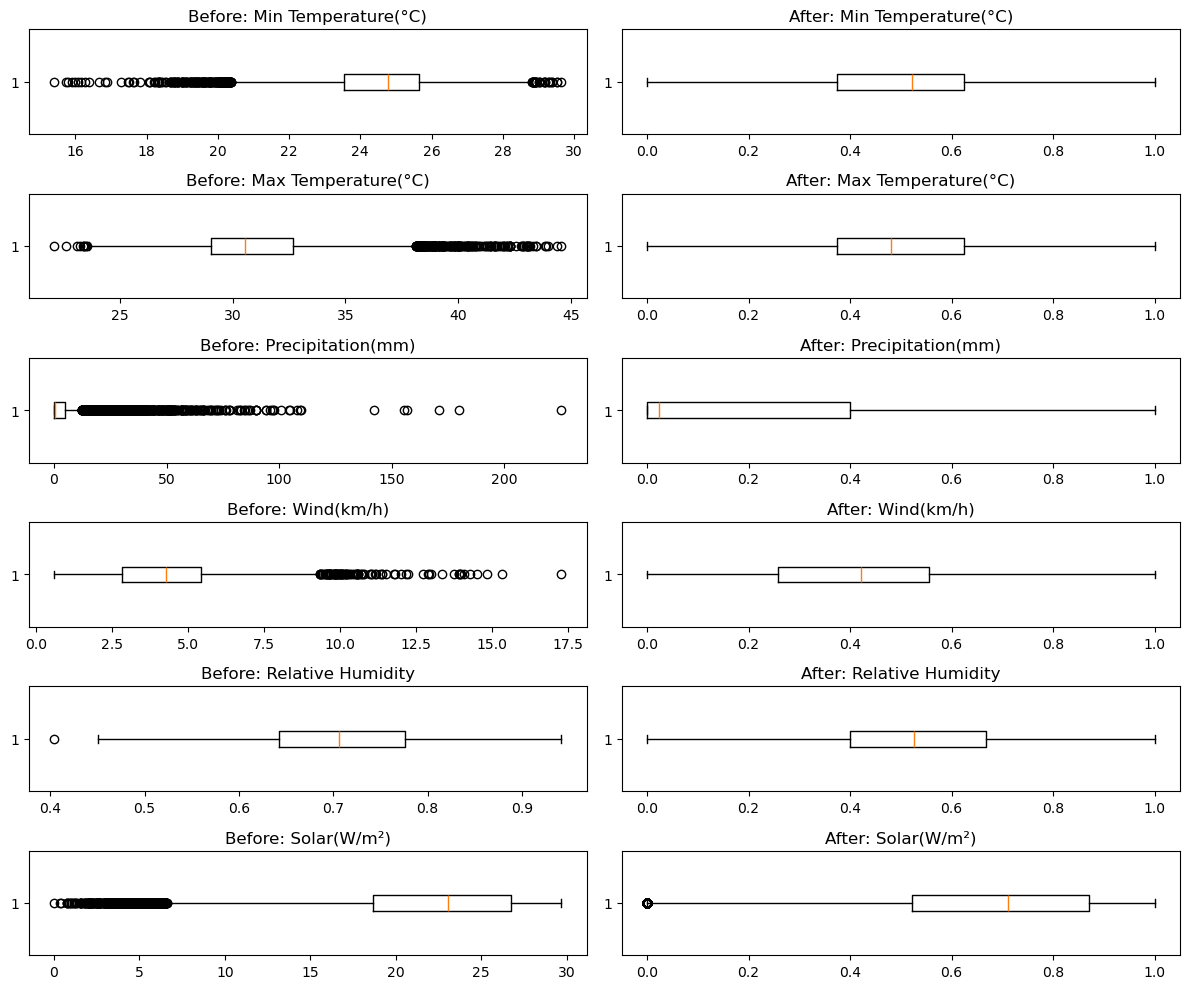

In [211]:
# Picked some columns to visualise


# Picked some columns to visualise
features_to_plot = ['Min Temperature(°C)',
       'Max Temperature(°C)', 'Precipitation(mm)',
       'Wind(km/h)', 'Relative Humidity', 'Solar(W/m²)']

fig, axes = plt.subplots(len(features_to_plot), 2, figsize=(12, 10))

for i, feat in enumerate(features_to_plot):
    # Boxplot before preprocessing
    axes[i,0].boxplot(old_df[feat].dropna(), vert=False)
    axes[i,0].set_title(f"Before: {feat}")
    
    # Boxplot after preprocessing
    axes[i,1].boxplot(df[feat].dropna(), vert=False)
    axes[i,1].set_title(f"After: {feat}")

plt.tight_layout()
plt.show()

## Feature Engineering

Additional date and month features added to improve predictions. The Sin and Cos functions add continuity to the dates and months, allowing the model to view the start and end points as being close together.

In [212]:
df['Month'] = df['Date'].dt.month
df['Day Of Year'] = df['Date'].dt.dayofyear

df['Month Sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month Cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Day Of Year Sin'] = np.sin(2 * np.pi * df['Day Of Year'] / 365)
df['Day Of Year Cos'] = np.cos(2 * np.pi * df['Day Of Year'] / 365)

In [213]:
df.head(5)

Min Temperature(°C)  Max Temperature(°C)  Precipitation(mm)  Wind(km/h)  \
0                0.566                0.333              1.000       0.726   
1                0.531                0.302              1.000       0.629   
2                0.604                0.288              1.000       0.621   
3                0.530                0.203              1.000       0.668   
4                0.545                0.328              0.726       0.638   

   Relative Humidity  Solar(W/m²)       Date  Month  Day Of Year  Month Sin  \
0              0.763        0.649 1979-01-01      1            1      0.500   
1              0.856        0.565 1979-01-02      1            2      0.500   
2              0.864        0.728 1979-01-03      1            3      0.500   
3              0.888        0.289 1979-01-04      1            4      0.500   
4              0.803        0.756 1979-01-05      1            5      0.500   

   Month Cos  Day Of Year Sin  Day Of Year Cos  
0      0.866            0.017            1.000  
1      0.866            0.034            0.999  
2      0.866            0.052            0.999  
3      0.866            0.069            0.998  
4      0.866            0.086            0.996

In [214]:
target_columns =['Min Temperature(°C)','Max Temperature(°C)']

Creating "lagged" features to improve predictions. One of the biggest determining factors for temperature on a given day is the previous day's temperature. This adds a feature to each row with the target temperature from the previous day, as well as the average target temperature from the previous week. Newly created null values are also dropped

In [215]:
def create_lag(num_days, target_columns):
    
    for target in target_columns:
        df[f'{target}_lag_{num_days}'] = df[target].shift(num_days)

def create_rolling_lag(num_days, target_columns):
    
    for target in target_columns:
        df[f'{target}_rolling_lag_{num_days}'] = df[target].shift(1).rolling(window=num_days).mean()

In [216]:
lags = [1, 2, 3]
rolling_lags = [7, 14, 30]

for i in lags:
    create_lag(i, target_columns)

for i in rolling_lags:
    create_rolling_lag(i, target_columns)
    
df_clean = df.dropna().reset_index(drop=True)

Printing DataFrame – Provides a final visual confirmation before saving.

In [217]:
df_clean.head(5)

Min Temperature(°C)  Max Temperature(°C)  Precipitation(mm)  Wind(km/h)  \
0                0.603                0.431              0.318       0.481   
1                0.582                0.481              0.408       0.411   
2                0.718                0.531              0.415       0.407   
3                0.660                0.396              1.000       0.618   
4                0.603                0.353              1.000       0.772   

   Relative Humidity  Solar(W/m²)       Date  Month  Day Of Year  Month Sin  \
0              0.673        0.906 1979-01-31      1           31      0.500   
1              0.695        0.881 1979-02-01      2           32      0.866   
2              0.673        0.928 1979-02-02      2           33      0.866   
3              0.747        0.814 1979-02-03      2           34      0.866   
4              0.743        0.909 1979-02-04      2           35      0.866   

   ...  Min Temperature(°C)_lag_2  Max Temperature(°C)_lag_2  \
0  ...                      0.620                      0.402   
1  ...                      0.633                      0.375   
2  ...                      0.603                      0.431   
3  ...                      0.582                      0.481   
4  ...                      0.718                      0.531   

   Min Temperature(°C)_lag_3  Max Temperature(°C)_lag_3  \
0                      0.537                      0.390   
1                      0.620                      0.402   
2                      0.633                      0.375   
3                      0.603                      0.431   
4                      0.582                      0.481   

   Min Temperature(°C)_rolling_lag_7  Max Temperature(°C)_rolling_lag_7  \
0                              0.591                              0.330   
1                              0.580                              0.339   
2                              0.583                              0.379   
3                              0.606                              0.419   
4                              0.622                              0.429   

   Min Temperature(°C)_rolling_lag_14  Max Temperature(°C)_rolling_lag_14  \
0                               0.593                               0.339   
1                               0.593                               0.341   
2                               0.592                               0.348   
3                               0.604                               0.367   
4                               0.612                               0.370   

   Min Temperature(°C)_rolling_lag_30  Max Temperature(°C)_rolling_lag_30  
0                               0.585                               0.321  
1                               0.586                               0.325  
2                               0.588                               0.331  
3                               0.592                               0.339  
4                               0.596                               0.345  

[5 rows x 25 columns]

In [218]:
old_df.head()

Date  Year  Month Month_Name  Min Temperature(°C)  \
0 1979-01-01  1979      1    January               25.154   
1 1979-01-02  1979      1    January               24.853   
2 1979-01-03  1979      1    January               25.469   
3 1979-01-04  1979      1    January               24.851   
4 1979-01-05  1979      1    January               24.974   

   Max Temperature(°C)  Precipitation(mm)  Wind(km/h)  Relative Humidity  \
0               28.419             13.125       6.932              0.824   
1               27.973             23.355       6.081              0.870   
2               27.772             39.468       6.015              0.874   
3               26.534             23.830       6.422              0.886   
4               28.343              9.089       6.162              0.844   

   Solar(W/m²)  Extreme_Days_Max Temperature(°C)  \
0       21.584                             False   
1       19.647                             False   
2       23.400                             False   
3       13.279                             False   
4       24.058                             False   

   Extreme_Days_Min Temperature(°C)  Extreme_Days_Precipitation(mm)  \
0                             False                           False   
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   

   Extreme_Days_Wind(km/h)  Decade  
0                    False    1970  
1                    False    1970  
2                    False    1970  
3                    False    1970  
4                    False    1970

In [219]:
# List of boolean columns to convert
bool_cols = [
    'Extreme_Days_Max Temperature(°C)',
    'Extreme_Days_Min Temperature(°C)',
    'Extreme_Days_Precipitation(mm)',
    'Extreme_Days_Wind(km/h)'
]

# Convert True → 1 and False → 0
old_df[bool_cols] = old_df[bool_cols].astype(int)
old_df.head()


Date  Year  Month Month_Name  Min Temperature(°C)  \
0 1979-01-01  1979      1    January               25.154   
1 1979-01-02  1979      1    January               24.853   
2 1979-01-03  1979      1    January               25.469   
3 1979-01-04  1979      1    January               24.851   
4 1979-01-05  1979      1    January               24.974   

   Max Temperature(°C)  Precipitation(mm)  Wind(km/h)  Relative Humidity  \
0               28.419             13.125       6.932              0.824   
1               27.973             23.355       6.081              0.870   
2               27.772             39.468       6.015              0.874   
3               26.534             23.830       6.422              0.886   
4               28.343              9.089       6.162              0.844   

   Solar(W/m²)  Extreme_Days_Max Temperature(°C)  \
0       21.584                                 0   
1       19.647                                 0   
2       23.400                                 0   
3       13.279                                 0   
4       24.058                                 0   

   Extreme_Days_Min Temperature(°C)  Extreme_Days_Precipitation(mm)  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   Extreme_Days_Wind(km/h)  Decade  
0                        0    1970  
1                        0    1970  
2                        0    1970  
3                        0    1970  
4                        0    1970

In [220]:
cols_to_add = [
    'Extreme_Days_Max Temperature(°C)',
    'Extreme_Days_Min Temperature(°C)',
    'Extreme_Days_Precipitation(mm)',
    'Extreme_Days_Wind(km/h)'
]



In [221]:
# Add selected columns from old_df to df_clean
df_clean[cols_to_add] = old_df[cols_to_add]


In [222]:
# Key interaction features
df_clean['Solar_Humidity'] = df_clean['Solar(W/m²)'] * df_clean['Relative Humidity']
df_clean['Solar_Wind'] = df_clean['Solar(W/m²)'] * df_clean['Wind(km/h)']
df_clean['Humidity_Wind'] = df_clean['Relative Humidity'] * df_clean['Wind(km/h)']
df_clean['Rain_Humidity'] = df_clean['Precipitation(mm)'] * df_clean['Relative Humidity']


In [223]:
df_clean.head()

Min Temperature(°C)  Max Temperature(°C)  Precipitation(mm)  Wind(km/h)  \
0                0.603                0.431              0.318       0.481   
1                0.582                0.481              0.408       0.411   
2                0.718                0.531              0.415       0.407   
3                0.660                0.396              1.000       0.618   
4                0.603                0.353              1.000       0.772   

   Relative Humidity  Solar(W/m²)       Date  Month  Day Of Year  Month Sin  \
0              0.673        0.906 1979-01-31      1           31      0.500   
1              0.695        0.881 1979-02-01      2           32      0.866   
2              0.673        0.928 1979-02-02      2           33      0.866   
3              0.747        0.814 1979-02-03      2           34      0.866   
4              0.743        0.909 1979-02-04      2           35      0.866   

   ...  Min Temperature(°C)_rolling_lag_30  \
0  ...                               0.585   
1  ...                               0.586   
2  ...                               0.588   
3  ...                               0.592   
4  ...                               0.596   

   Max Temperature(°C)_rolling_lag_30  Extreme_Days_Max Temperature(°C)  \
0                               0.321                                 0   
1                               0.325                                 0   
2                               0.331                                 0   
3                               0.339                                 0   
4                               0.345                                 0   

   Extreme_Days_Min Temperature(°C)  Extreme_Days_Precipitation(mm)  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   Extreme_Days_Wind(km/h)  Solar_Humidity  Solar_Wind  Humidity_Wind  \
0                        0           0.610       0.436          0.324   
1                        0           0.612       0.362          0.286   
2                        0           0.625       0.378          0.274   
3                        0           0.608       0.503          0.462   
4                        0           0.675       0.701          0.573   

   Rain_Humidity  
0          0.214  
1          0.284  
2          0.279  
3          0.747  
4          0.743  

[5 rows x 33 columns]

In [224]:
# Count values between -1°C and +1°C
close_to_zero = old_df[(df_clean['Max Temperature(°C)'] >= -1) & (old_df['Max Temperature(°C)'] <= 1)]

print("Number of values near 0°C Max temp :", len(close_to_zero))
print("Percentage of dataset:", round(len(close_to_zero) / len(old_df) * 100, 2), "%")


Number of values near 0°C Max temp : 0
Percentage of dataset: 0.0 %


In [225]:
# Count values between -1°C and +1°C
close_to_zero = df_clean[(df_clean['Max Temperature(°C)'] >= -1) & (df_clean['Max Temperature(°C)'] <= 1)]

print("Number of values near 0°C Max Temp:", len(close_to_zero))
print("Percentage of dataset:", round(len(close_to_zero) / len(df_clean) * 100, 2), "%")

Number of values near 0°C Max Temp: 12838
Percentage of dataset: 100.0 %


Saving to CSV – Stores the cleaned, well-formatted dataset for later analysis, sharing, or modeling.

In [226]:
# Exporting the cleaned and formatted DataFrame to a CSV file
# index=False ensures that the DataFrame's index is not written as a separate column in the CSV.
# This makes the file cleaner and easier to use in other tools.

df_clean.to_csv('weatherdata_preprocessed.csv', index=False)

# Model Building 

In [227]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [228]:
df_clean = pd.read_csv('weatherdata_preprocessed.csv')

feature_columns = df_clean.drop(['Max Temperature(°C)','Min Temperature(°C)','Date'], axis=1).columns.to_list()

print(f"Target Columns: {target_columns}")
print(f"Feature Columns: {feature_columns}")

Target Columns: ['Min Temperature(°C)', 'Max Temperature(°C)']
Feature Columns: ['Precipitation(mm)', 'Wind(km/h)', 'Relative Humidity', 'Solar(W/m²)', 'Month', 'Day Of Year', 'Month Sin', 'Month Cos', 'Day Of Year Sin', 'Day Of Year Cos', 'Min Temperature(°C)_lag_1', 'Max Temperature(°C)_lag_1', 'Min Temperature(°C)_lag_2', 'Max Temperature(°C)_lag_2', 'Min Temperature(°C)_lag_3', 'Max Temperature(°C)_lag_3', 'Min Temperature(°C)_rolling_lag_7', 'Max Temperature(°C)_rolling_lag_7', 'Min Temperature(°C)_rolling_lag_14', 'Max Temperature(°C)_rolling_lag_14', 'Min Temperature(°C)_rolling_lag_30', 'Max Temperature(°C)_rolling_lag_30', 'Extreme_Days_Max Temperature(°C)', 'Extreme_Days_Min Temperature(°C)', 'Extreme_Days_Precipitation(mm)', 'Extreme_Days_Wind(km/h)', 'Solar_Humidity', 'Solar_Wind', 'Humidity_Wind', 'Rain_Humidity']


Split data into testing and training sets

In [229]:
split_idx = int(len(df_clean) * 0.8)
train_data = df_clean.iloc[:split_idx]
test_data = df_clean.iloc[split_idx:]

X_train = train_data[feature_columns]
y_train = train_data[target_columns]

X_test = test_data[feature_columns]
y_test = test_data[target_columns]

Use Gridsearch to find optimal hyperparameters for the model

In [230]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

base_model = MultiOutputRegressor(RandomForestRegressor(random_state=42, n_jobs=-1))

In [231]:
#Old GridsearchCV

'''from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [10, 15, 20],
    'estimator__min_samples_split': [3, 4, 5, 6, 7],
    'estimator__min_samples_leaf': [1, 2, 3, 4]
}

tscv = TimeSeriesSplit(n_splits=3)
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=tscv,
    scoring='r2',
    n_jobs=1,
    verbose=1
)

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

print("\nBest hyperparameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param.replace('estimator__', '')}: {value}")
print(f"Best cross-validation R² score: {grid_search.best_score_:.4f}")'''

'from sklearn.model_selection import GridSearchCV, TimeSeriesSplit\n\nparam_grid = {\n    \'estimator__n_estimators\': [100, 200, 300],\n    \'estimator__max_depth\': [10, 15, 20],\n    \'estimator__min_samples_split\': [3, 4, 5, 6, 7],\n    \'estimator__min_samples_leaf\': [1, 2, 3, 4]\n}\n\ntscv = TimeSeriesSplit(n_splits=3)\ngrid_search = GridSearchCV(\n    estimator=base_model,\n    param_grid=param_grid,\n    cv=tscv,\n    scoring=\'r2\',\n    n_jobs=1,\n    verbose=1\n)\n\ngrid_search.fit(X_train, y_train)\nmodel = grid_search.best_estimator_\n\nprint("\nBest hyperparameters found:")\nfor param, value in grid_search.best_params_.items():\n    print(f"  {param.replace(\'estimator__\', \'\')}: {value}")\nprint(f"Best cross-validation R² score: {grid_search.best_score_:.4f}")'

In [232]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'estimator__n_estimators': [100, 200, 300, 500],
    'estimator__max_depth': [10, 15, 20, None],
    'estimator__min_samples_split': [2, 3, 5, 7],
    'estimator__min_samples_leaf': [1, 2, 3, 5],
    'estimator__max_features': ['sqrt', 'log2', 0.5],  # Controls how many features each split considers
    'estimator__bootstrap': [True, False]
}

tscv = TimeSeriesSplit(n_splits=2)  

random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_distributions,
    n_iter=15,  
    cv=tscv,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
model = random_search.best_estimator_

print(f"\nBest hyperparameters found: {random_search.best_params_}")

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV] END estimator__bootstrap=False, estimator__max_depth=10, estimator__max_features=log2, estimator__min_samples_leaf=2, estimator__min_samples_split=7, estimator__n_estimators=100; total time=   2.9s
[CV] END estimator__bootstrap=False, estimator__max_depth=15, estimator__max_features=0.5, estimator__min_samples_leaf=1, estimator__min_samples_split=3, estimator__n_estimators=500; total time=  43.8s

Best hyperparameters found: {'estimator__n_estimators': 300, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 1, 'estimator__max_features': 0.5, 'estimator__max_depth': 15, 'estimator__bootstrap': True}


In [233]:
model

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=15,
                                                     max_features=0.5,
                                                     min_samples_split=5,
                                                     n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=42))

In [234]:
y_test_pred = model.predict(X_test)

In [236]:
from sklearn.metrics import mean_squared_error, r2_score

print("\nOptimized Model Performance:")
for i, target in enumerate(target_columns):
    test_rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i]))
    test_r2 = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
    print(f"{target}: RMSE = {test_rmse:.2f}°C, R² = {test_r2:.3f}")


Optimized Model Performance:
Min Temperature(°C): RMSE = 0.08°C, R² = 0.836
Max Temperature(°C): RMSE = 0.11°C, R² = 0.621


Visualize a singular decision tree from the Random Forest

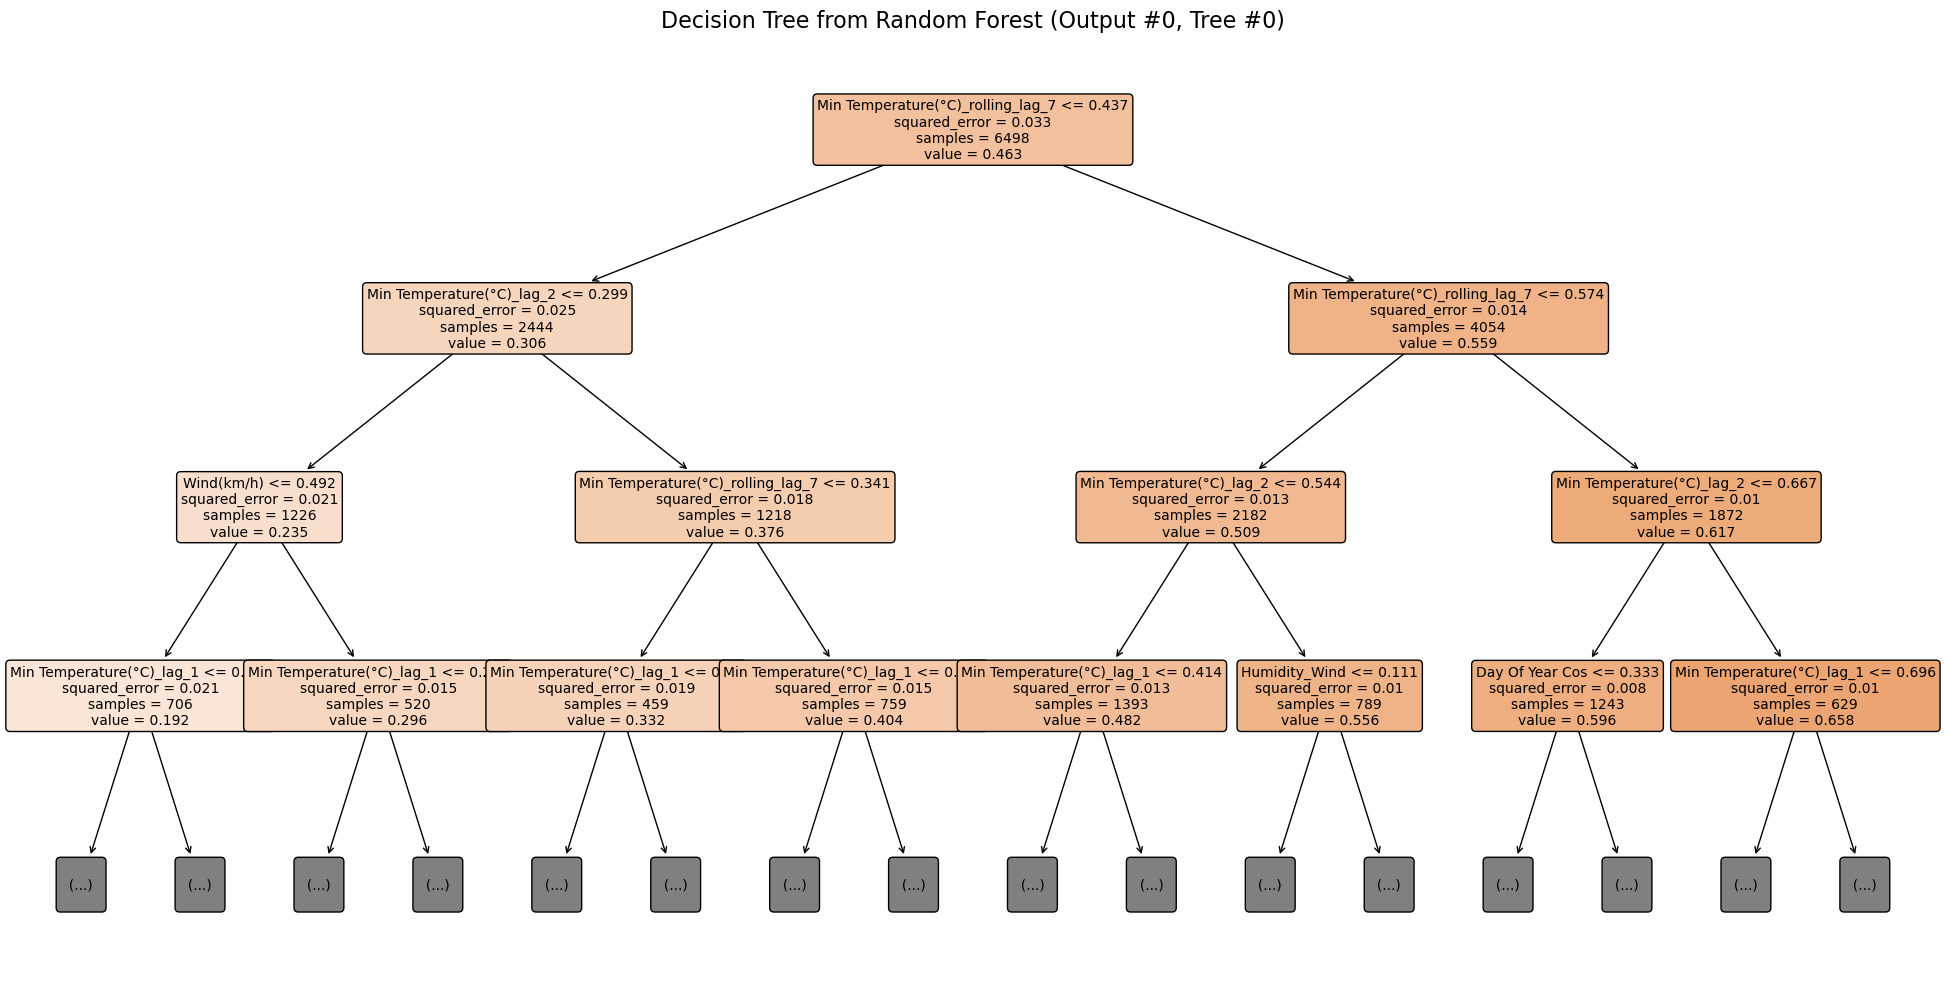

In [241]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access the RandomForest through the MultiOutputRegressor
# MultiOutputRegressor stores individual estimators in the estimators_ attribute
rf_model = model.estimators_[0]  # Get the first output's RandomForest

# Extract a single tree from that RandomForest
single_tree = rf_model.estimators_[0]  # Get the first tree

# Create plot
plt.figure(figsize=(20, 10))
plot_tree(single_tree, 
          filled=True,
          feature_names=X_train.columns,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Limit depth for readability

plt.title("Decision Tree from Random Forest (Output #0, Tree #0)", fontsize=16)
plt.tight_layout()
plt.show()

Plot the predictions against the actual values

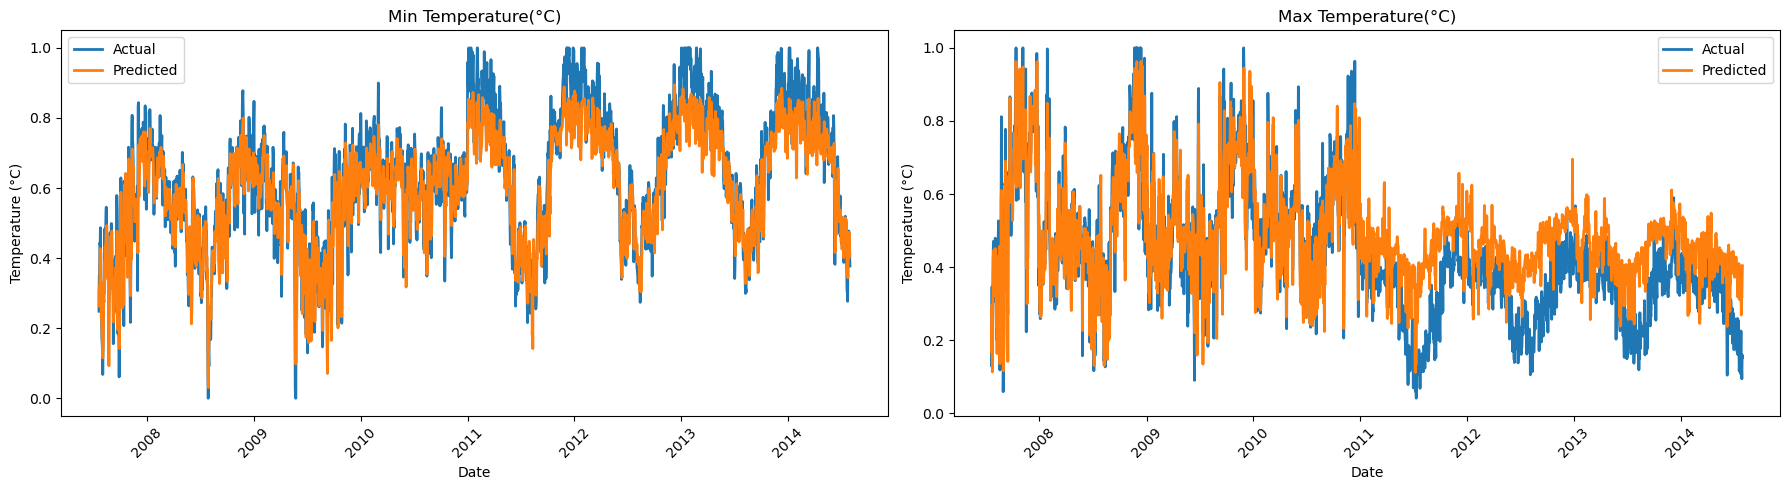

In [242]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
# Convert to datetime if not already
test_data.loc[:, 'Date'] = pd.to_datetime(test_data['Date'])
test_dates = test_data['Date']
for i, target in enumerate(target_columns):
    test_data.loc[:, 'Date'] = pd.to_datetime(test_data['Date'])
    axes[i].plot(test_dates, y_test.iloc[:, i].values, label='Actual', linewidth=2)
    axes[i].plot(test_dates, y_test_pred[:, i], label='Predicted', linewidth=2)
    axes[i].set_title(target)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Temperature (°C)')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Model Evaluation and Testing

 #### 1. Cross-validation (k-fold)

In [243]:
'''
This section performs 5-fold cross-validation to evaluate the model.
- The dataset is split into 5 equal parts (folds).
- For each fold:
    * The model is trained on 4/5 of the data.
    * The remaining 1/5 is used for testing.
- This process is repeated 5 times, each with a different test fold.
- We collect the R² score (goodness of fit) for each fold.
- Finally, we calculate the mean R² across all folds,
  which gives a more reliable estimate of model performance
  than a single train/test split.
'''

kf = KFold(n_splits=5, shuffle=False)  
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

print("Cross-validation R² scores:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))

Cross-validation R² scores: [0.85654928 0.84371157 0.86484655 0.87479071 0.86651291]
Mean CV R²: 0.861282202916683


#### 2. Key evaluation Matrics (MAE, MAPE,R_SQUARED) 

In [244]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# --- Define SMAPE function ---
def smape(y_true, y_pred):
    """
    Calculates Symmetric Mean Absolute Percentage Error (SMAPE).
    Safer than MAPE for values near zero.
    Returns % error (0–100 scale).
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    epsilon = 1e-8  # prevents division by zero
    diff = np.abs(y_true - y_pred) / np.maximum(denominator, epsilon)
    return 100 * np.mean(diff)

# --- Model evaluation loop ---
'''
This section evaluates the model’s predictions for each target variable.
- Loops over all target columns (e.g., Max Temp, Min Temp).
- Extracts the true values (y_test) and predicted values (y_test_pred).
- Calculates four key evaluation metrics:
    * MAE   (Mean Absolute Error) - average size of errors in °C.
    * MAPE  (Mean Absolute Percentage Error) - average % error relative to true values.
    * SMAPE (Symmetric Mean Absolute Percentage Error) - more stable % error for near-zero values.
    * R²    (Coefficient of Determination) - how well predictions fit actual values.
- Prints the metrics for each target, formatted for readability.
'''

for i, target in enumerate(target_columns):
    y_true = y_test.iloc[:, i]
    y_pred = y_test_pred[:, i]
    
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    smape_val = smape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{target}:")
    print(f"  MAE   = {mae:.2f} °C")
    print(f"  MAPE  = {mape:.2f} %")
    print(f"  SMAPE = {smape_val:.2f} %")
    print(f"  R²    = {r2:.3f}")



Min Temperature(°C):
  MAE   = 0.06 °C
  MAPE  = 58311907088372.42 %
  SMAPE = 10.71 %
  R²    = 0.836

Max Temperature(°C):
  MAE   = 0.08 °C
  MAPE  = 28.84 %
  SMAPE = 21.79 %
  R²    = 0.621


#### 3. Model Performance and Error Patterns

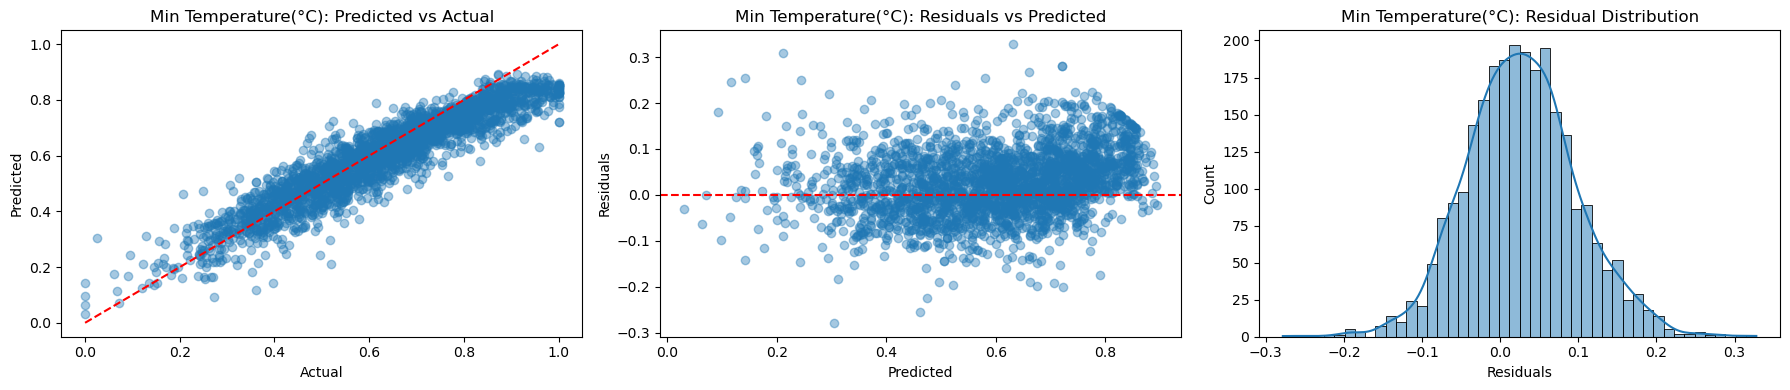

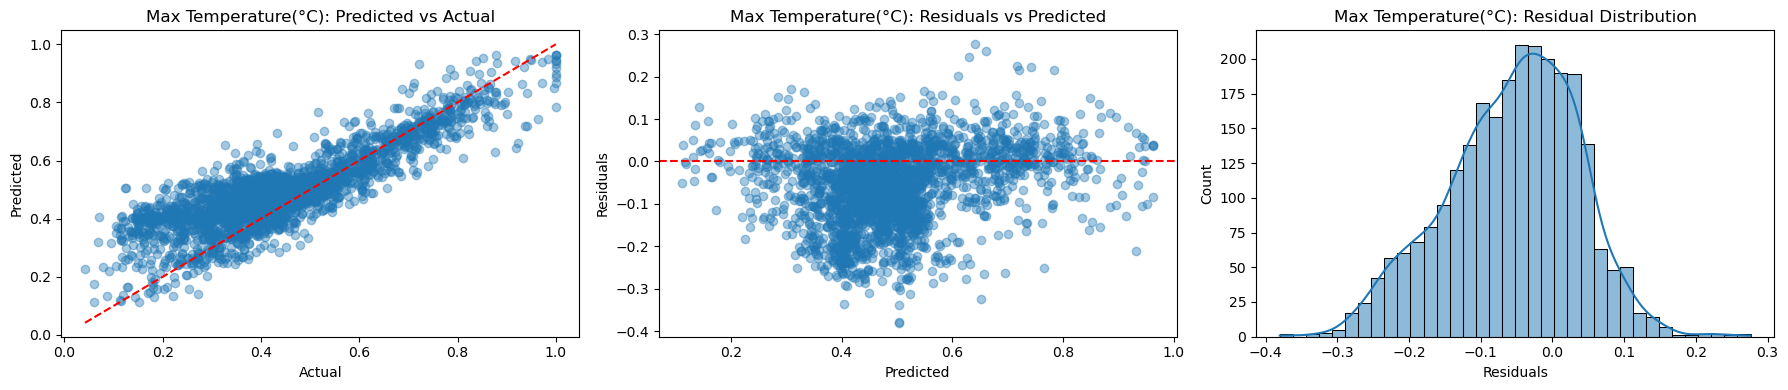

In [245]:
'''
This section generates diagnostic plots for each target variable.
The goal is to visually check model performance and error patterns:
1. Predicted vs Actual (parity plot):
   - Compares true vs predicted values.
   - Points close to the red diagonal line = good predictions.
2. Residuals vs Predicted:
   - Plots errors (residuals) against predicted values.
   - Should look like random scatter around 0 (no visible pattern).
   - Patterns/trends would suggest model bias.
3. Residual Distribution (histogram + KDE):
   - Shows how residuals are distributed.
   - A roughly symmetric bell-shaped curve centered at 0 is ideal.
'''

for i, target in enumerate(target_columns):
    y_true = y_test.iloc[:, i]
    y_pred = y_test_pred[:, i]
    residuals = y_true - y_pred

    fig, ax = plt.subplots(1, 3, figsize=(18, 4))
    
    # Predicted vs Actual (parity plot)
    ax[0].scatter(y_true, y_pred, alpha=0.4)
    ax[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    ax[0].set_title(f"{target}: Predicted vs Actual")
    ax[0].set_xlabel("Actual")
    ax[0].set_ylabel("Predicted")
    
    # Residuals vs Predicted
    ax[1].scatter(y_pred, residuals, alpha=0.4)
    ax[1].axhline(0, color='r', linestyle='--')
    ax[1].set_title(f"{target}: Residuals vs Predicted")
    ax[1].set_xlabel("Predicted")
    ax[1].set_ylabel("Residuals")
    
    # Histogram of Residuals
    sns.histplot(residuals, kde=True, ax=ax[2])
    ax[2].set_title(f"{target}: Residual Distribution")
    ax[2].set_xlabel("Residuals")
    
    plt.tight_layout()
    plt.show()

#### 4. Feature Impontance 

In [246]:
'''
Feature Importances for MultiOutput Random Forest (clean Top-N plots)

What this does:
- Works whether our model is a bare RandomForestRegressor, a Pipeline, or a
  MultiOutputRegressor(RandomForestRegressor).
- For multi-output, it extracts the Random Forest used for each target and
  plots a separate Top-N importance chart (so labels don't overlap).
- For single "overall" view, it also computes an average importance
  across targets (optional: set `PLOT_OVERALL=True`).

Requirements:
- `model` is our fitted model
- `feature_columns` is a list of input feature names in the same order as X
- `target_columns` is a list of our target names (e.g., ["Max Temp", "Min Temp"])
'''

from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# how many top features to show per target
# also shows an averaged-importance plot across all targets
top_n = 15          
plot_overall = True 


In [247]:
def _get_final_estimator(m):
    """Return the final estimator if `m` is a Pipeline; else return `m`."""
    if isinstance(m, Pipeline):
        # Try common names, otherwise just take the last step
        if 'regressor' in m.named_steps:
            return m.named_steps['regressor']
        return list(m.named_steps.values())[-1]
    return m

def _get_rf_for_target(model, target_idx=0):
    """
    Given a possibly wrapped model, return the RandomForestRegressor
    used for the specified target index.
    """
    base = _get_final_estimator(model)
    if isinstance(base, MultiOutputRegressor):
        est = base.estimators_[target_idx]
        # in case each sub-estimator is also a Pipeline
        return _get_final_estimator(est)  
    # single-output case
    return base

def _get_feature_importances_for_target(model, target_idx):
    """Returning a numpy array of feature importances for a given target index."""
    rf = _get_rf_for_target(model, target_idx)
    if not hasattr(rf, "feature_importances_"):
        raise AttributeError("Underlying estimator does not expose .feature_importances_. "
                             "Ensure you are using RandomForestRegressor (or similar).")
    return rf.feature_importances_

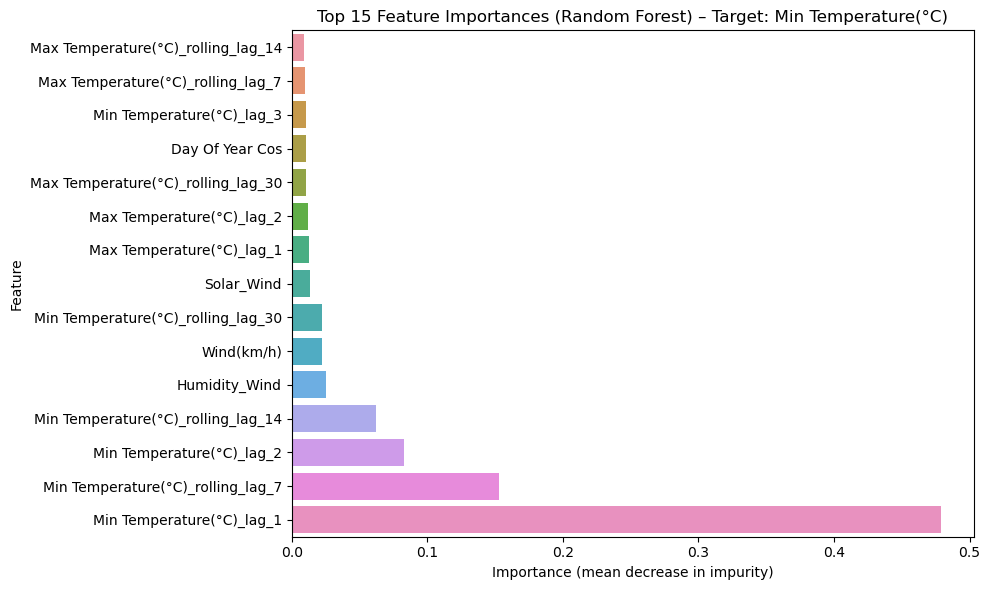

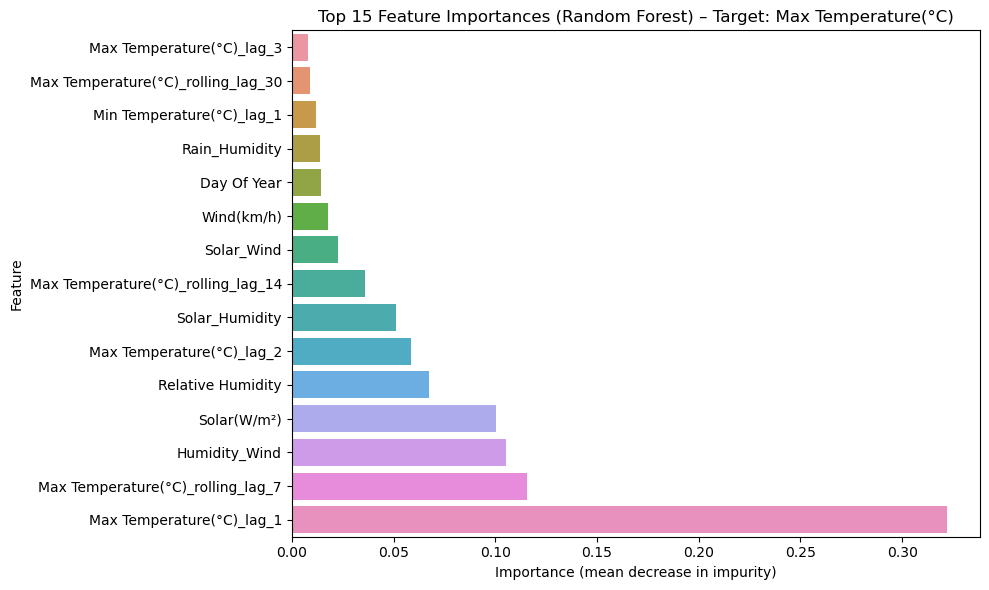

In [248]:

# Per-target plots

for i, target in enumerate(target_columns):
    # 1) fetching importances for this target
    importances = _get_feature_importances_for_target(model, i)

    # 2) mapping to feature names and sort
    feat_imp = pd.Series(importances, index=feature_columns).sort_values(ascending=False)

    # 3) keeping only Top-N for readability
    top_feat_imp = feat_imp.head(top_n).iloc[::-1]  

    # 4) plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_feat_imp.values, y=top_feat_imp.index)
    plt.title(f"Top {top_n} Feature Importances (Random Forest) – Target: {target}")
    plt.xlabel("Importance (mean decrease in impurity)")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

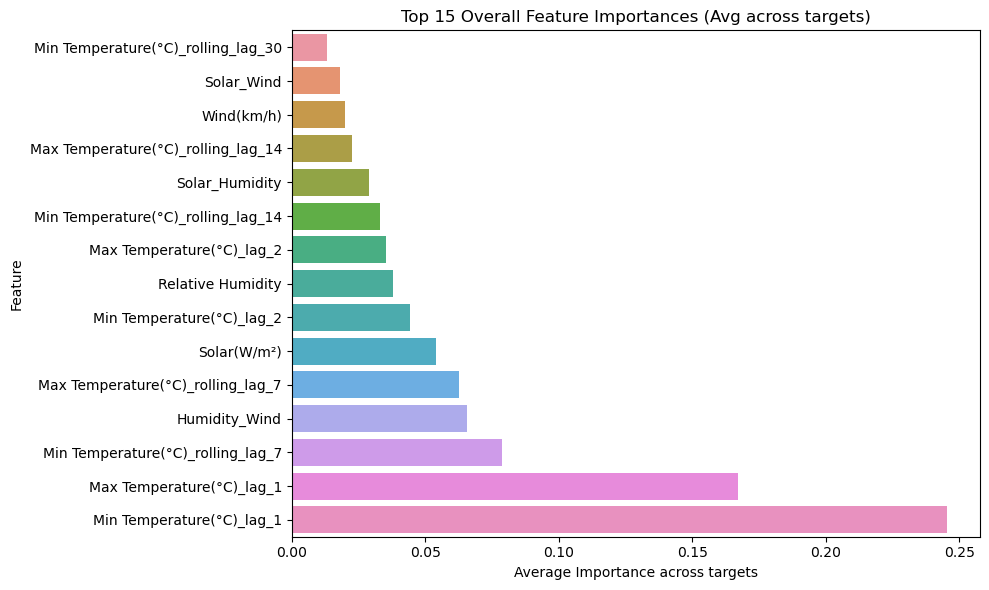

In [249]:

# Overall (average across targets)

if plot_overall:
    # If single-output, this still works (len(target_columns) == 1)
    all_imps = []
    for i in range(len(target_columns)):
        all_imps.append(_get_feature_importances_for_target(model, i))
    # shape: [n_targets, n_features]
    all_imps = np.vstack(all_imps)  
    mean_imp = all_imps.mean(axis=0)

    overall = pd.Series(mean_imp, index=feature_columns).sort_values(ascending=False)
    top_overall = overall.head(top_n).iloc[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_overall.values, y=top_overall.index)
    plt.title(f"Top {top_n} Overall Feature Importances (Avg across targets)")
    plt.xlabel("Average Importance across targets")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

## Learning Curve (Bias vs Variance check)

Shows training vs validation error as training size increases.
Helps detect overfitting/underfitting.

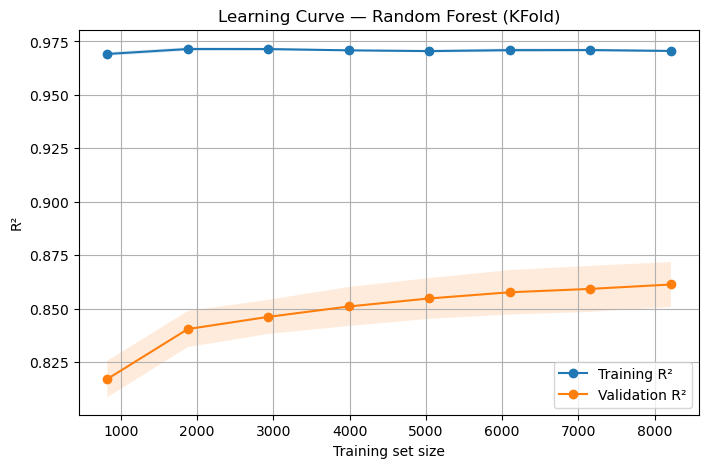

In [250]:
''''
Learning Curve for Random Forest using KFold Cross-Validation

Purpose:
- Shows how Random Forest performance (R² or RMSE) changes as the training set grows.
- Helps detect underfitting (both scores low), overfitting (big gap between curves),
  or if adding more data keeps improving validation performance.

How the code works:
1. Defining training set sizes as fractions (10% → 100% of training data).
2. Using sklearn's learning_curve function:
   - Splits training data into folds using KFold cross-validation.
   - For each fraction of data, fits the model on that subset.
   - Computes both training and validation scores across folds.
3. Average scores across folds and plot the results.
4. Plot:
   - Training curve = model fit quality on subsets it was trained on.
   - Validation curve = generalization performance on unseen folds.
'''


from sklearn.model_selection import learning_curve, KFold


estimator = model  

# Matching the CV choice we choose earlier (KFold).The data is time-ordered so we keep shuffle=False.
kf = KFold(n_splits=5, shuffle=False)

train_sizes = np.linspace(0.1, 1.0, 8)

# R²-based learning curve (averages across targets for multi-output)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=estimator,
    X=X_train, y=y_train,
    cv=kf,
    scoring="r2",
    train_sizes=train_sizes,
    n_jobs=1,        
    verbose=0
)

train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_mean   = val_scores.mean(axis=1)
val_std    = val_scores.std(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, marker="o", label="Training R²")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.15)
plt.plot(train_sizes, val_mean, marker="o", label="Validation R²")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.15)
plt.xlabel("Training set size"); plt.ylabel("R²")
plt.title("Learning Curve — Random Forest (KFold)")
plt.legend(); plt.grid(True)
plt.show()


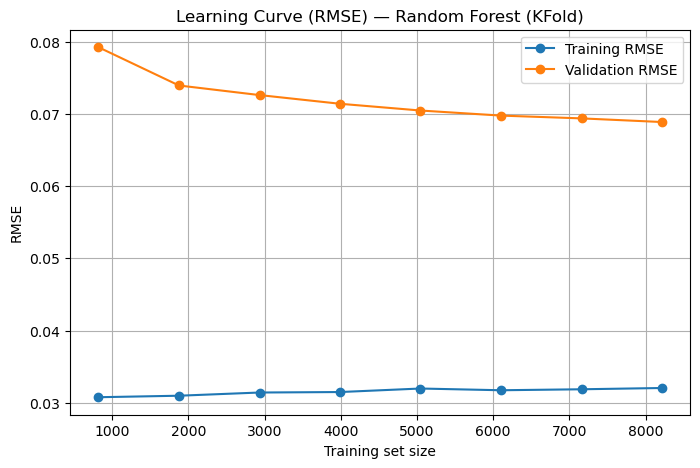

In [252]:
'''
Learning Curve for Random Forest using KFold Cross-Validation (RMSE version)

Purpose:
- Tracks model error (Root Mean Squared Error) as the training set grows.
- RMSE is easier to interpret since it’s in the same units as the target variable.
- Helps identify if the model benefits from more data or if it overfits.

How the code works:
1. Define training set sizes as fractions (10% → 100% of training data).
2. Using sklearn's learning_curve function:
   - Splits training data into folds using KFold cross-validation.
   - For each fraction, fits the model on that subset.
   - Computes negative MSE scores .
3. Convert negative MSE into RMSE (take square root of positive MSE).
4. Average RMSE across folds for training and validation sets.
5. Plot curves to compare training vs validation error.

Interpretation:
- Training RMSE low & Validation RMSE high → overfitting.
- Both RMSE high & close together → underfitting.
- Both RMSE decreasing and converging → healthy learning, more data still helps.
'''

train_sizes = np.linspace(0.1, 1.0, 8)

train_sizes, train_scores, val_scores = learning_curve(
    estimator=estimator,
    X=X_train, y=y_train,
    cv=kf,
    scoring="neg_mean_squared_error",
    train_sizes=train_sizes,
    n_jobs=1
)

train_rmse = np.sqrt((-train_scores).mean(axis=1))
val_rmse   = np.sqrt((-val_scores).mean(axis=1))

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_rmse, marker="o", label="Training RMSE")
plt.plot(train_sizes, val_rmse, marker="o", label="Validation RMSE")
plt.xlabel("Training set size"); plt.ylabel("RMSE")
plt.title("Learning Curve (RMSE) — Random Forest (KFold)")
plt.legend(); plt.grid(True)
plt.show()


# Model testing with unseen data 

In [82]:

unseen_df = pd.read_csv("unseen_testdata_15rows.csv")
print(unseen_df.shape)
unseen_df.head()


(15, 31)


Date  Precipitation(mm)  Wind(km/h)  Relative Humidity  Solar(W/m²)  \
0  2014-08-01              0.491      -0.564             -0.604       -0.720   
1  2014-08-02             -0.142      -1.014              1.845       -0.461   
2  2014-08-03              0.642       0.312             -0.017        1.057   
3  2014-08-04              1.515      -0.910             -1.059        0.344   
4  2014-08-05             -0.238      -1.414              0.817       -1.763   

   Month  Day Of Year  Month Sin  Month Cos  Day Of Year Sin  ...  \
0  4.870      269.021      0.070      0.275            0.569  ...   
1  5.877      191.958      0.686      1.000           -0.636  ...   
2  2.719      151.474     -0.495      0.113            1.000  ...   
3  2.411      192.453     -0.230      0.171           -0.985  ...   
4  9.301        1.000     -0.276     -0.064            0.424  ...   

   Min Temperature(°C)_rolling_lag_30  Max Temperature(°C)_rolling_lag_30  \
0                              -0.688                               0.019   
1                              -0.465                               0.524   
2                               0.621                              -0.233   
3                               0.507                               0.251   
4                              -0.017                              -0.096   

   Extreme_Days_Max Temperature(°C)  Extreme_Days_Min Temperature(°C)  \
0                             0.009                             0.033   
1                             0.000                             0.000   
2                             0.018                             0.000   
3                             0.000                             0.000   
4                             0.107                             0.000   

   Extreme_Days_Precipitation(mm)  Extreme_Days_Wind(km/h)  Solar_Humidity  \
0                           0.062                    0.000          -1.198   
1                           0.162                    0.096           0.183   
2                           0.000                    0.028          -1.617   
3                           0.050                    0.227           1.513   
4                           0.079                    0.000           0.866   

   Solar_Wind  Humidity_Wind  Rain_Humidity  
0       0.360          1.695          0.791  
1      -1.325          1.412          2.454  
2      -0.403         -0.450         -0.765  
3      -0.141          0.684         -1.110  
4       0.252          0.381          0.652  

[5 rows x 31 columns]

In [83]:
# Defining the same feature list used in training
feature_columns = [
    'Precipitation(mm)', 'Wind(km/h)', 'Relative Humidity', 'Solar(W/m²)', 
    'Month', 'Day Of Year', 'Month Sin', 'Month Cos', 'Day Of Year Sin', 'Day Of Year Cos',
    'Min Temperature(°C)_lag_1', 'Max Temperature(°C)_lag_1', 
    'Min Temperature(°C)_lag_2', 'Max Temperature(°C)_lag_2',
    'Min Temperature(°C)_lag_3', 'Max Temperature(°C)_lag_3',
    'Min Temperature(°C)_rolling_lag_7', 'Max Temperature(°C)_rolling_lag_7',
    'Min Temperature(°C)_rolling_lag_14', 'Max Temperature(°C)_rolling_lag_14',
    'Min Temperature(°C)_rolling_lag_30', 'Max Temperature(°C)_rolling_lag_30',
    'Extreme_Days_Max Temperature(°C)', 'Extreme_Days_Min Temperature(°C)', 
    'Extreme_Days_Precipitation(mm)', 'Extreme_Days_Wind(km/h)',
    'Solar_Humidity', 'Solar_Wind', 'Humidity_Wind', 'Rain_Humidity'
]

# Selecting feature data
X_unseen = unseen_df[feature_columns]


In [84]:
# Predicting for unseen data
y_pred_unseen = model.predict(X_unseen)

# Convering predictions to DataFrame
predictions = pd.DataFrame(y_pred_unseen, columns=['Pred_Min_Temp(°C)', 'Pred_Max_Temp(°C)'])

# Combining with Date for clarity
results = pd.concat([unseen_df[['Date']], predictions], axis=1)

# Display results
print("15-Day Unseen Data Predictions:")
print(results)


15-Day Unseen Data Predictions:
          Date  Pred_Min_Temp(°C)  Pred_Max_Temp(°C)
0   2014-08-01              0.099              0.782
1   2014-08-02             -0.128              0.423
2   2014-08-03             -0.157              0.538
3   2014-08-04              0.214              0.709
4   2014-08-05             -0.173             -0.408
5   2014-08-06             -0.398             -0.133
6   2014-08-07              0.806             -0.149
7   2014-08-08              0.131             -0.186
8   2014-08-09             -0.312              1.404
9   2014-08-10              0.433              0.218
10  2014-08-11             -0.632              0.074
11  2014-08-12              0.482              0.605
12  2014-08-13              1.097              0.386
13  2014-08-14             -0.784              0.343
14  2014-08-15              0.654              1.410


In [85]:

y_train.head()



Min Temperature(°C)  Max Temperature(°C)
0                0.545               -0.377
1                0.441               -0.120
2                1.136                0.138
3                0.842               -0.562
4                0.548               -0.782

[CV] END estimator__bootstrap=False, estimator__max_depth=15, estimator__max_features=0.5, estimator__min_samples_leaf=3, estimator__min_samples_split=3, estimator__n_estimators=300; total time=  42.3s
[CV] END estimator__bootstrap=False, estimator__max_depth=10, estimator__max_features=log2, estimator__min_samples_leaf=2, estimator__min_samples_split=7, estimator__n_estimators=100; total time=   1.5s
[CV] END estimator__bootstrap=False, estimator__max_depth=15, estimator__max_features=0.5, estimator__min_samples_leaf=1, estimator__min_samples_split=3, estimator__n_estimators=500; total time=  34.7s
[CV] END estimator__bootstrap=False, estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=5, estimator__min_samples_split=3, estimator__n_estimators=100; total time=   2.2s
[CV] END estimator__bootstrap=False, estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=5, estimator__min_samples_split=3, estimator__n_estimators=100; to